# <a id='toc1_'></a>[Single Cell Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Single Cell Analysis](#toc1_)    
  - [Setup and data loading](#toc1_1_)    
    - [QC - extracellular spots](#toc1_1_1_)    
  - [Single-cell analysis](#toc1_2_)    
  - [Spot abundance heterogeneity](#toc1_3_)    
    - [Quantitative heterogeneity](#toc1_3_1_)    
  - [Distinct segments per cell](#toc1_4_)    
  - [Pattern of vRNA in mRNA abundant cells](#toc1_5_)    
    - [vRNA spot counts vs mRNA spot counts](#toc1_5_1_)    
      - [All cells](#toc1_5_1_1_)    
      - [cells with all 8 mRNAs](#toc1_5_1_2_)    
  - [Specific Questions](#toc1_6_)    
    - [Is there an association between a particular segment and high vRNA expression?](#toc1_6_1_)    
    - [Linear model to predict total vRNA from mRNA segments](#toc1_6_2_)    
    - [Effect of missing vRNA on total vRNA](#toc1_6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Setup and data loading](#toc0_)

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
theme_set(theme_light())
theme_update(text = element_text(family = "Calibri"), strip.text = element_text(colour = 'black'))
options(repr.plot.res = 300, repr.plot.width=8, repr.plot.height=6)

In [3]:
segment_order = c("PB2","PB1","PA","HA","NP","NA","M","NS")

In [4]:
spots <- read_tsv("analysis/spot_detection/seq_2nt/all_spots.tsv.xz")

Rows: 2169762 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): target
dbl (24): rep, moi, hpi, fov, intensity, z, y, x, radius, spot_id, z_min, z_...
lgl  (4): passes_thresholds, nucleus, border_cell, ambiguous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### <a id='toc1_1_1_'></a>[QC - extracellular spots](#toc0_)

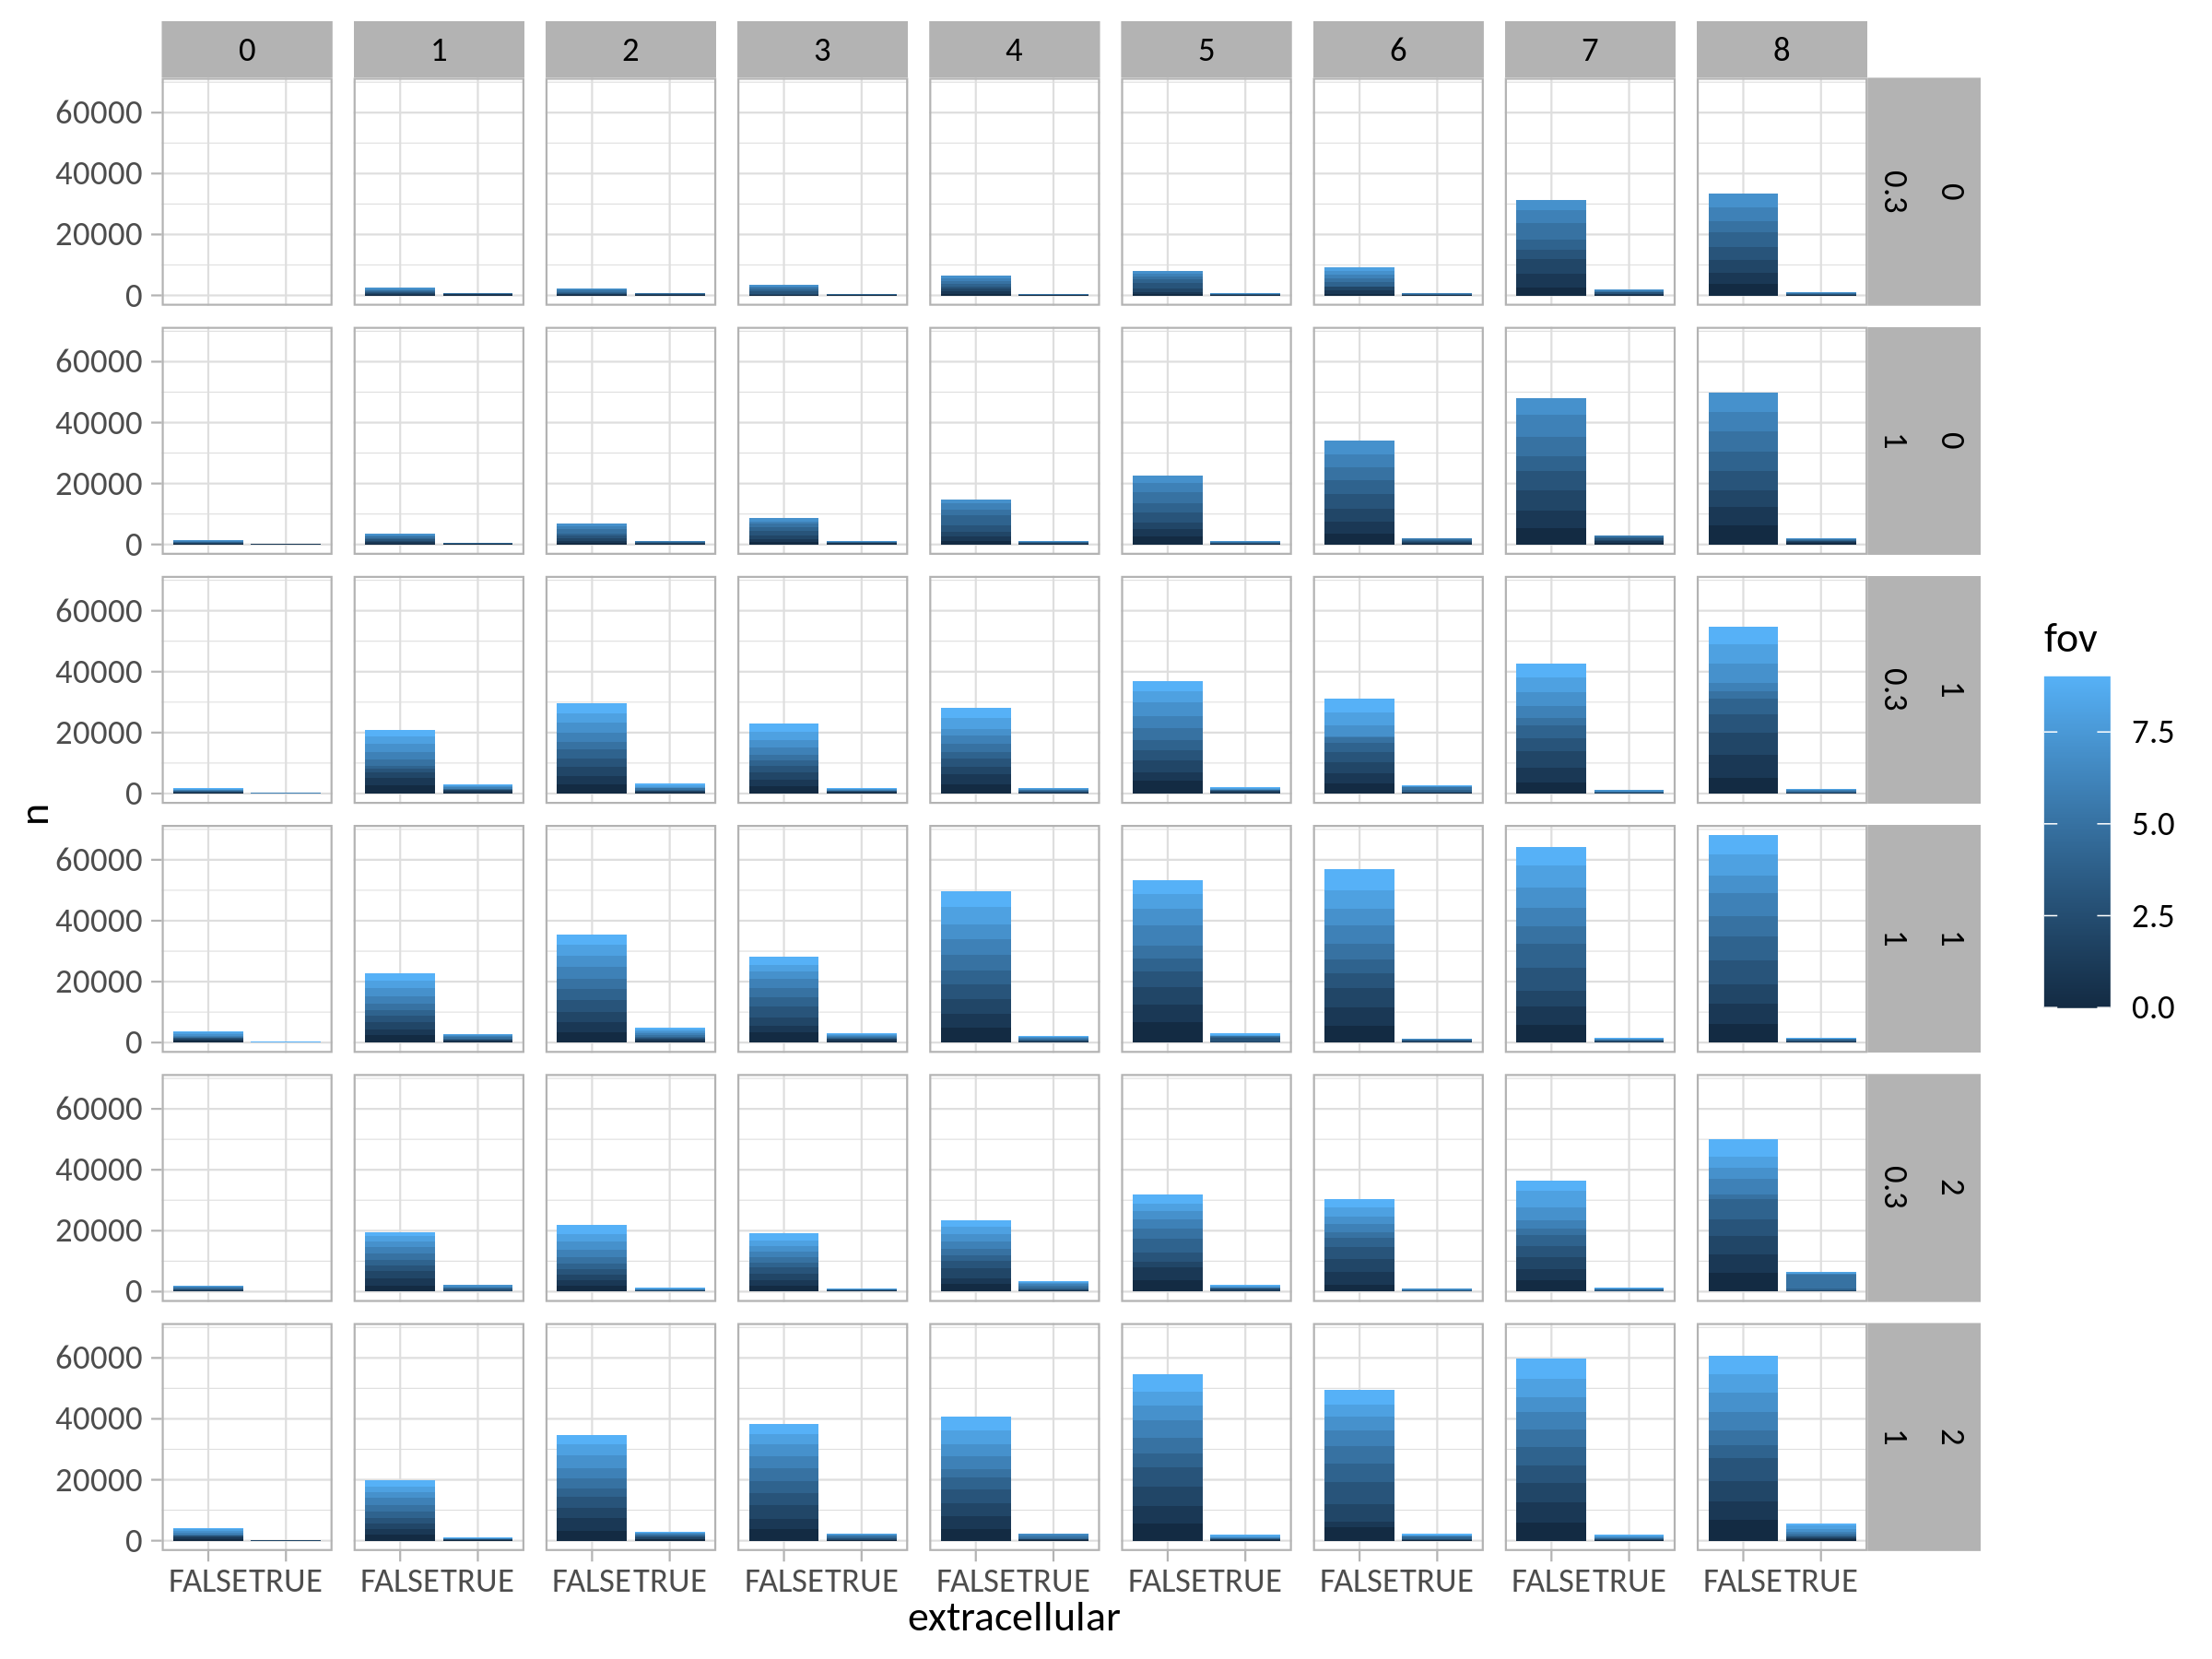

In [5]:
spots %>%
  filter(target != "missing") %>%
  mutate(extracellular = cell==0) %>%
  count(rep,moi,hpi,fov,extracellular) %>%
  ggplot(aes(extracellular, n, fill=fov)) + geom_col() + facet_grid(rep + moi ~ hpi)

In [6]:
spots %>%
  filter(target != "missing") %>%
  mutate(extracellular = cell==0) %>%
  count(rep,moi,hpi,fov,extracellular) %>%
  pivot_wider(names_from = extracellular, values_from = n, values_fill=0) %>%
  mutate(total=`TRUE`+`FALSE`, percent_extracellular = `TRUE`/total) %>%
  arrange(-percent_extracellular)

rep,moi,hpi,fov,FALSE,TRUE,total,percent_extracellular
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
2,0.3,8,5,1726,4639,6365,0.7288295
0,0.3,1,0,136,285,421,0.6769596
0,0.3,2,1,177,208,385,0.5402597
0,0.3,2,3,182,185,367,0.5040872
0,0.3,3,0,140,87,227,0.3832599
0,0.3,6,3,41,24,65,0.3692308
1,0.3,6,5,1890,867,2757,0.3144723
0,0.3,2,2,221,99,320,0.3093750
0,0.3,1,5,338,150,488,0.3073770


In [7]:
spots <- spots %>%
	filter(cell > 0) %>% # remove extracellular spots (probably cells without proper segmentation)
	group_by(rep,moi,hpi,fov,cell) %>%
	filter(n()>=5) %>%
	group_by(rep,moi,hpi,fov) %>%
	mutate(infected_cells=n_distinct(cell)) %>%
	mutate(rep=as_factor(rep), moi=as_factor(moi), fov=as_factor(fov), cell=str_glue("{rep}_{moi}_{hpi}_{fov}_{cell}")) %>%
	ungroup

## <a id='toc1_2_'></a>[Single-cell analysis](#toc0_)

In [8]:
spots_per_cell <- spots %>%
	mutate(target=if_else(str_detect(target,","),"multi",target)) %>%
	separate(target, into=c("segment","molecule"), sep=" ", fill="right") %>%
	mutate(segment = fct_relevel(segment, segment_order)) %>%
	mutate(molecule=as_factor(molecule)) %>%
	group_by(rep,moi,hpi,fov,cell) %>%
	count(segment,molecule)

In [9]:
spots_per_cell_cytonuc <- spots %>%
	mutate(
    target=if_else(str_detect(target,","),"multi",target),
    localisation = if_else(nucleus, "nucleus", "cytoplasm")
  ) %>%
	separate(target, into=c("segment","molecule"), sep=" ", fill="right") %>%
	mutate(segment = fct_relevel(segment, segment_order)) %>%
	mutate(molecule=as_factor(molecule)) %>%
	group_by(rep,moi,hpi,fov,cell,localisation) %>%
	count(segment,molecule)

In [10]:
spots_per_cell %>% write_tsv("analysis/spot_detection/seq_2nt/spots_per_cell.tsv.xz")
spots_per_cell_cytonuc %>% write_tsv("analysis/spot_detection/seq_2nt/spots_per_cell_cytonuc.tsv.xz")

## <a id='toc1_3_'></a>[Spot abundance heterogeneity](#toc0_)

In order to see how heterogeneous the spot count per cell is, we plot the cumulative spot number by cell (sorted by spot count)

`summarise()` has grouped output by 'molecule', 'rep', 'moi', 'hpi', 'fov'. You
can override using the `.groups` argument.


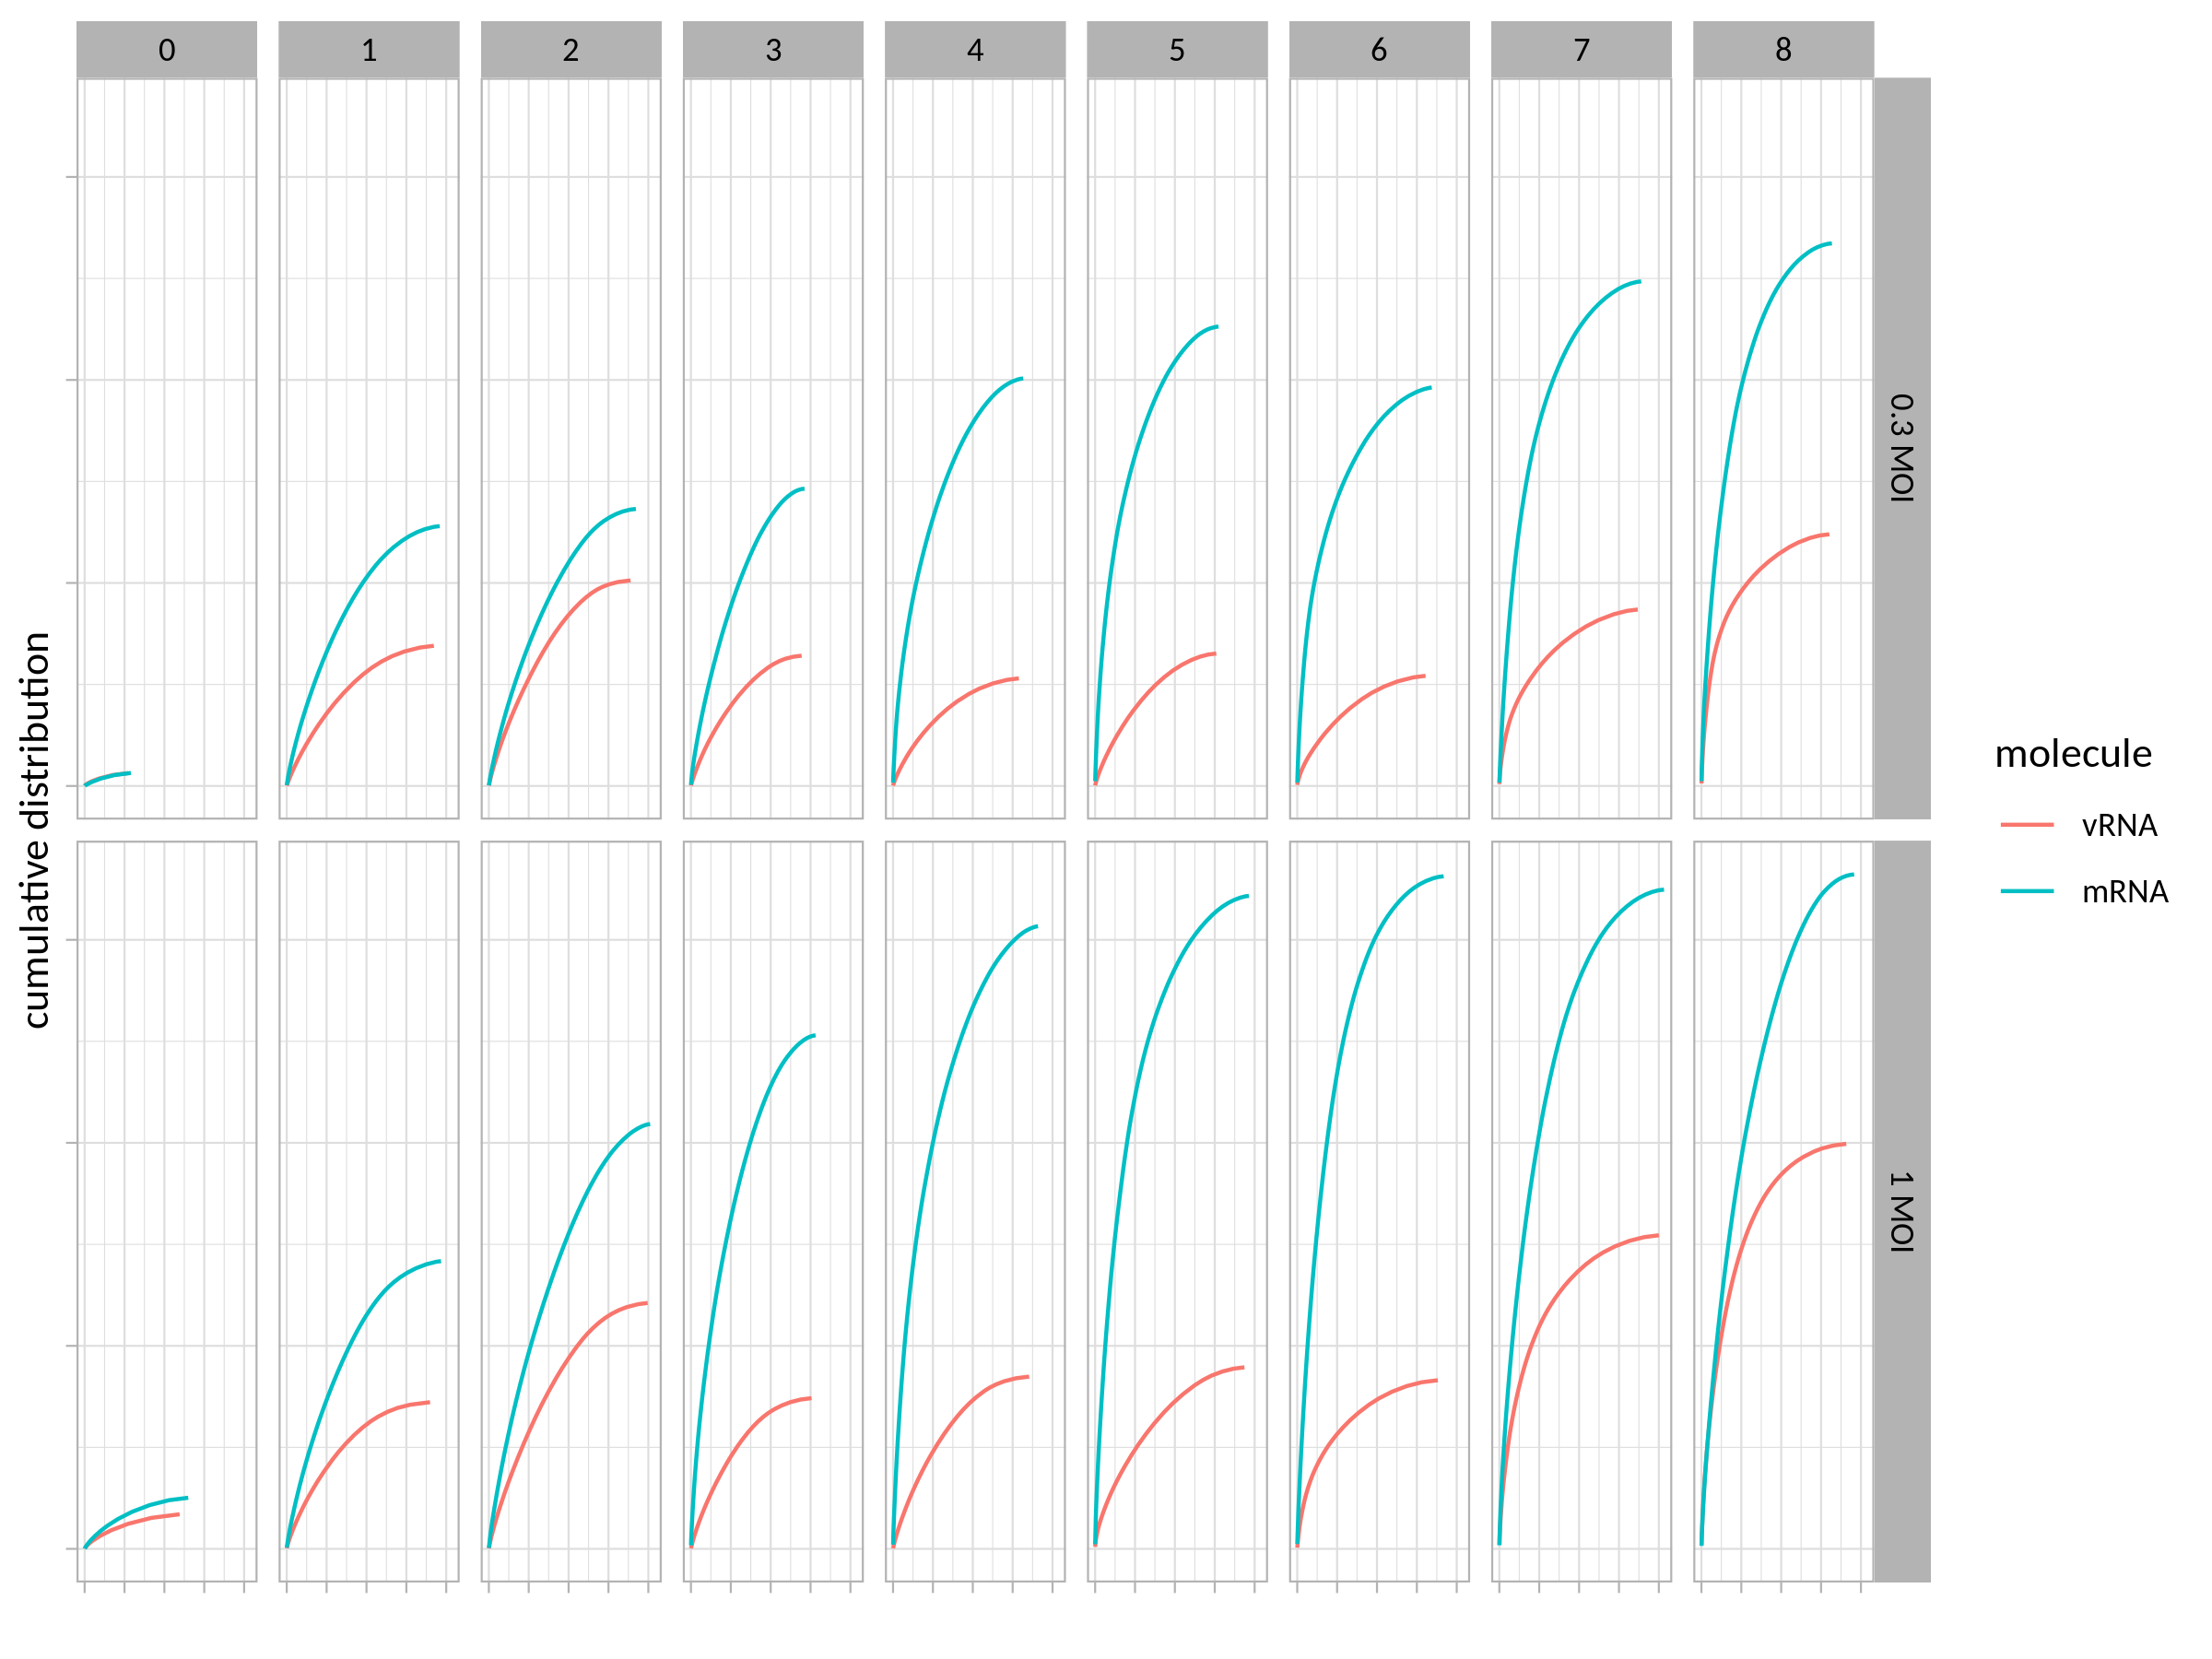

In [11]:
spots_per_cell %>%
  filter(!is.na(molecule)) %>%
  group_by(molecule,rep,moi,hpi,fov,cell) %>%
  summarize(n=sum(n)) %>%
  group_by(molecule,moi,hpi) %>%
  arrange(-n) %>%
  mutate(cs=cumsum(n),i=row_number()) %>%
  ungroup() %>%
  mutate(moi=str_glue("{moi} MOI"), molecule=fct_relevel(molecule,"vRNA")) %>%
  ggplot(aes(i,cs,color=molecule)) +
    geom_line() +
    facet_grid(moi ~ hpi) +
    xlab("") + ylab("cumulative distribution") +
    theme(axis.text.y = element_blank(), axis.text.x = element_blank())

In [12]:
ggsave("figures/fig6b-molecule_abundance.svg", width = 8, height = 6, dpi = 300)

`summarise()` has grouped output by 'segment', 'rep', 'moi', 'hpi', 'fov'. You
can override using the `.groups` argument.


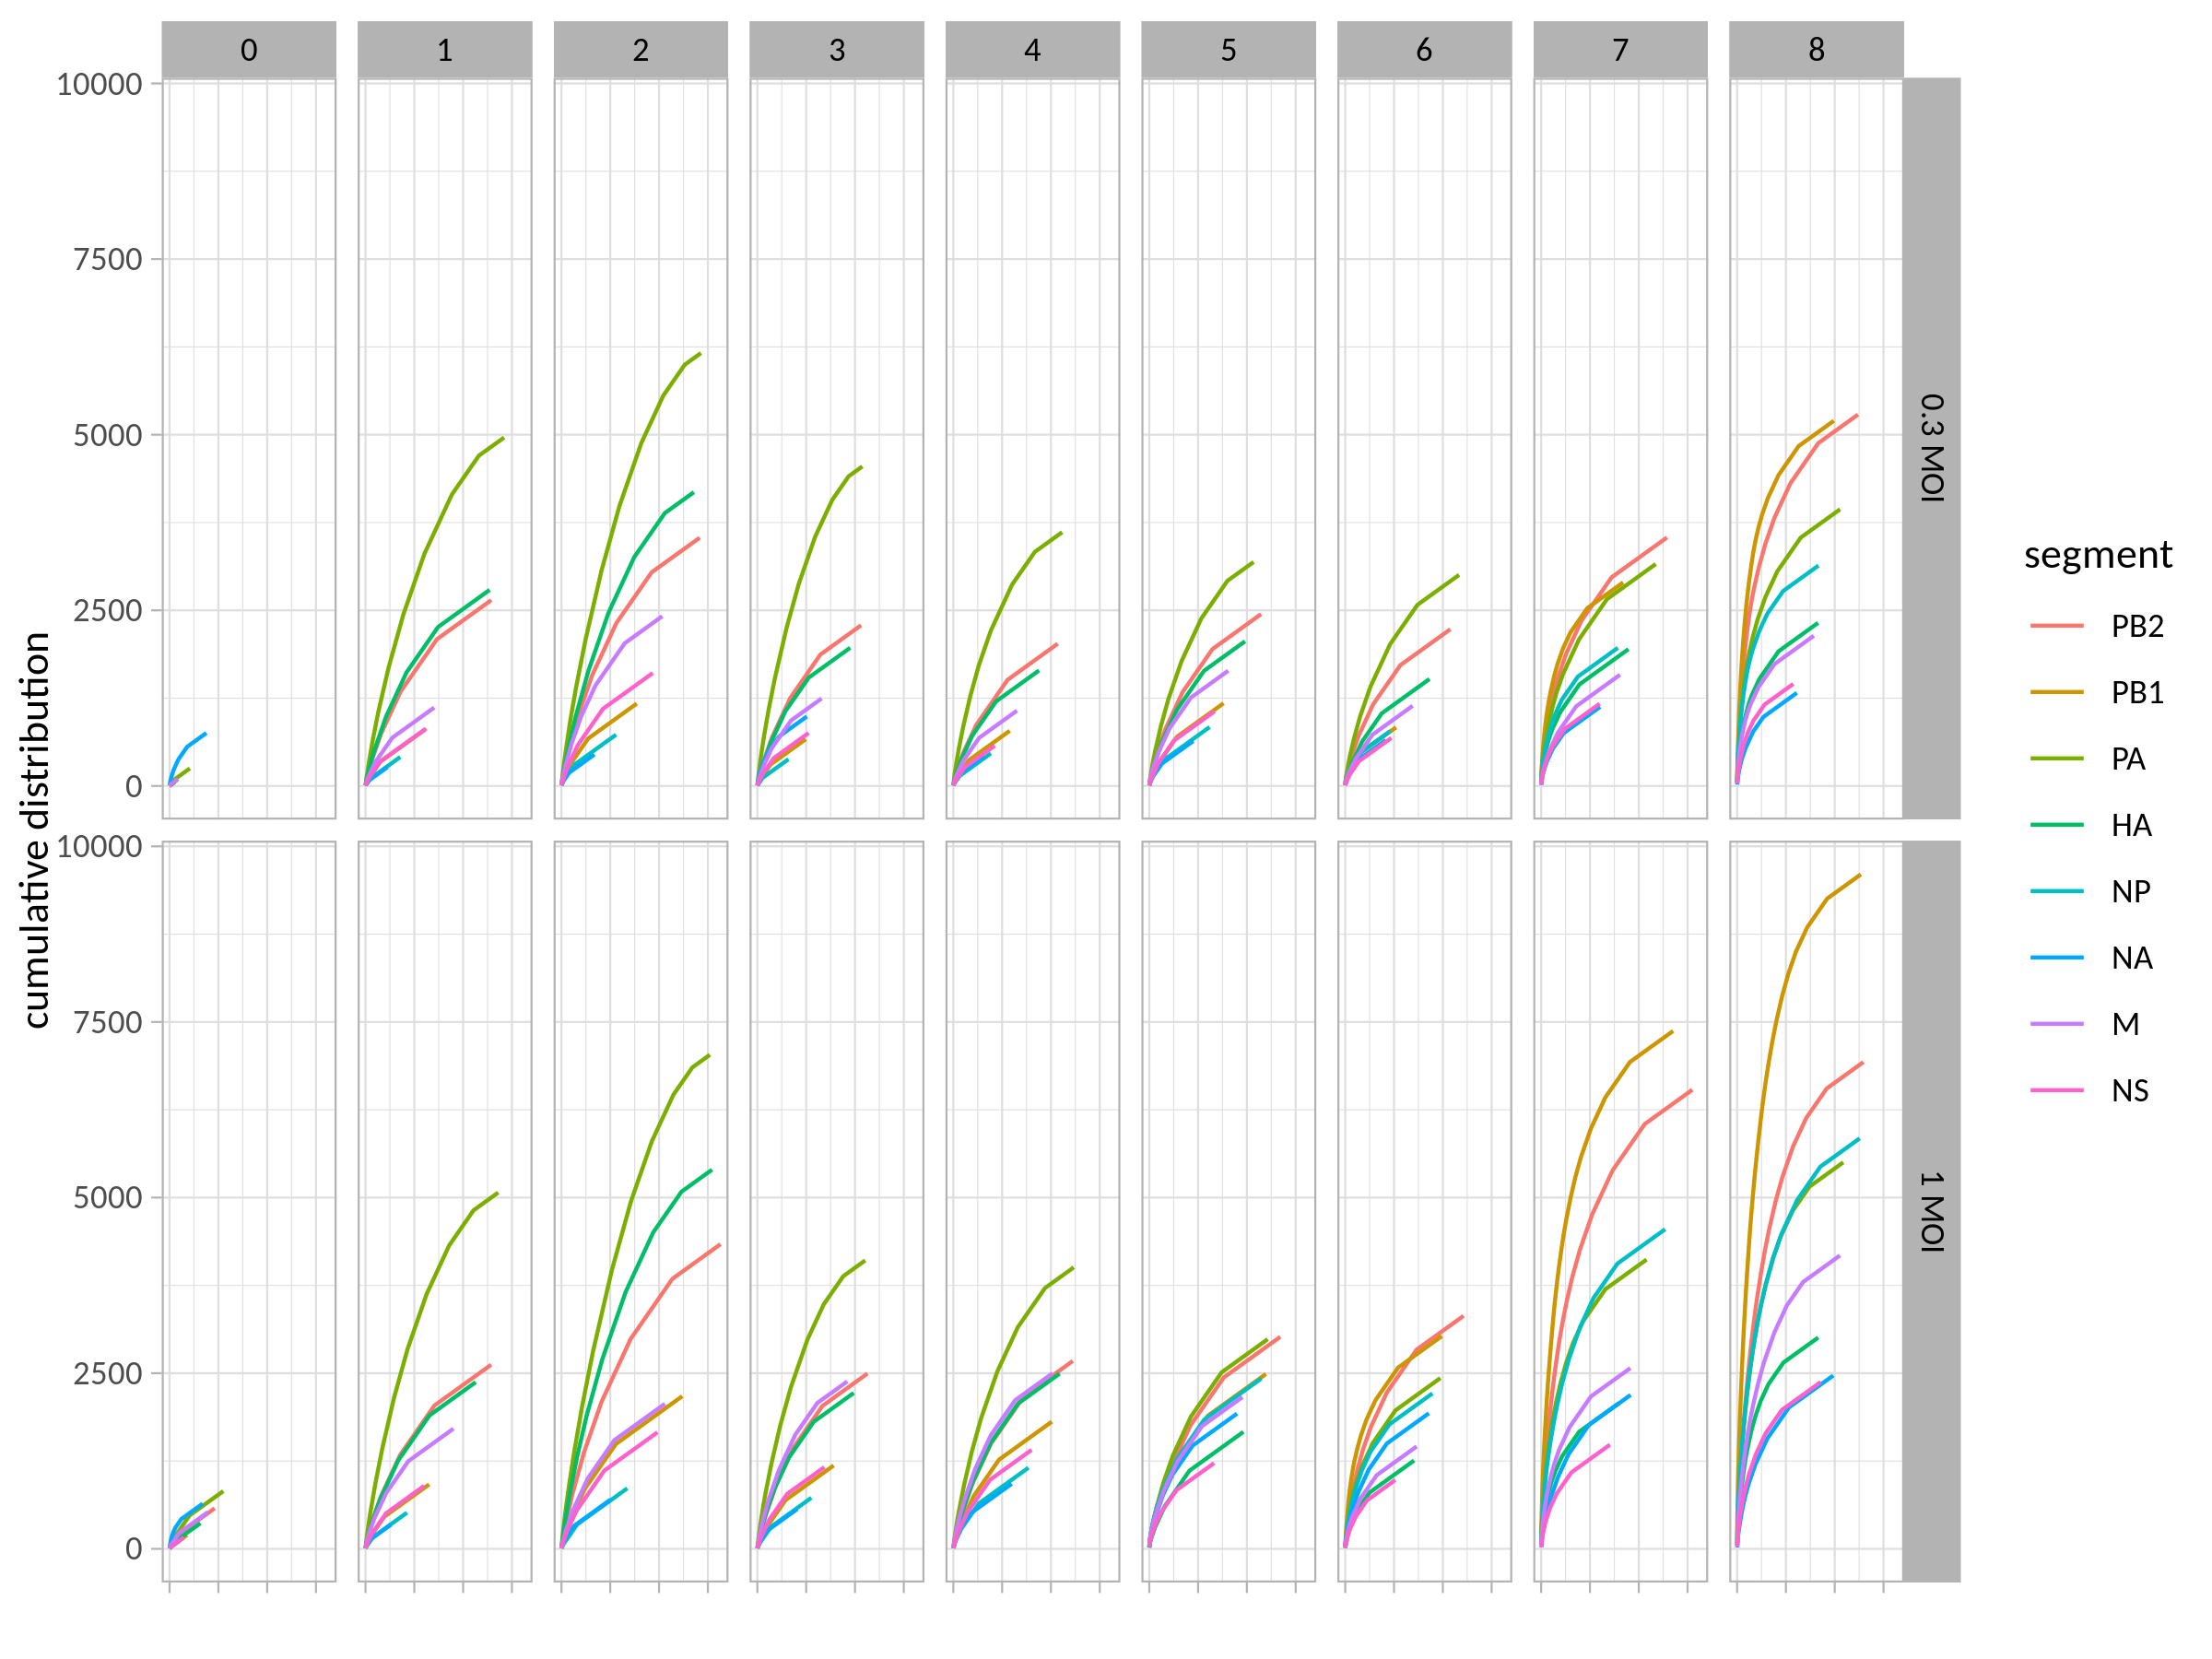

In [13]:
spots_per_cell %>%
  filter(molecule == "vRNA") %>%
  group_by(segment,rep,moi,hpi,fov,cell) %>%
  summarize(n=sum(n)) %>%
  group_by(moi,hpi,segment) %>%
  arrange(-n) %>%
  mutate(cs=cumsum(n),i=row_number()) %>%
  ungroup() %>%
  mutate(moi=str_glue("{moi} MOI")) %>%
  ggplot(aes(i,cs,color=segment)) +
    geom_line() +
    facet_grid(moi ~ hpi) +
    xlab("") + ylab("cumulative distribution") +
    theme(axis.text.x = element_blank())

In [14]:
ggsave("figures/supp-fig10a-vRNA_segment_abundance.svg", width = 8, height = 6, dpi = 300)

`summarise()` has grouped output by 'segment', 'rep', 'moi', 'hpi', 'fov'. You
can override using the `.groups` argument.


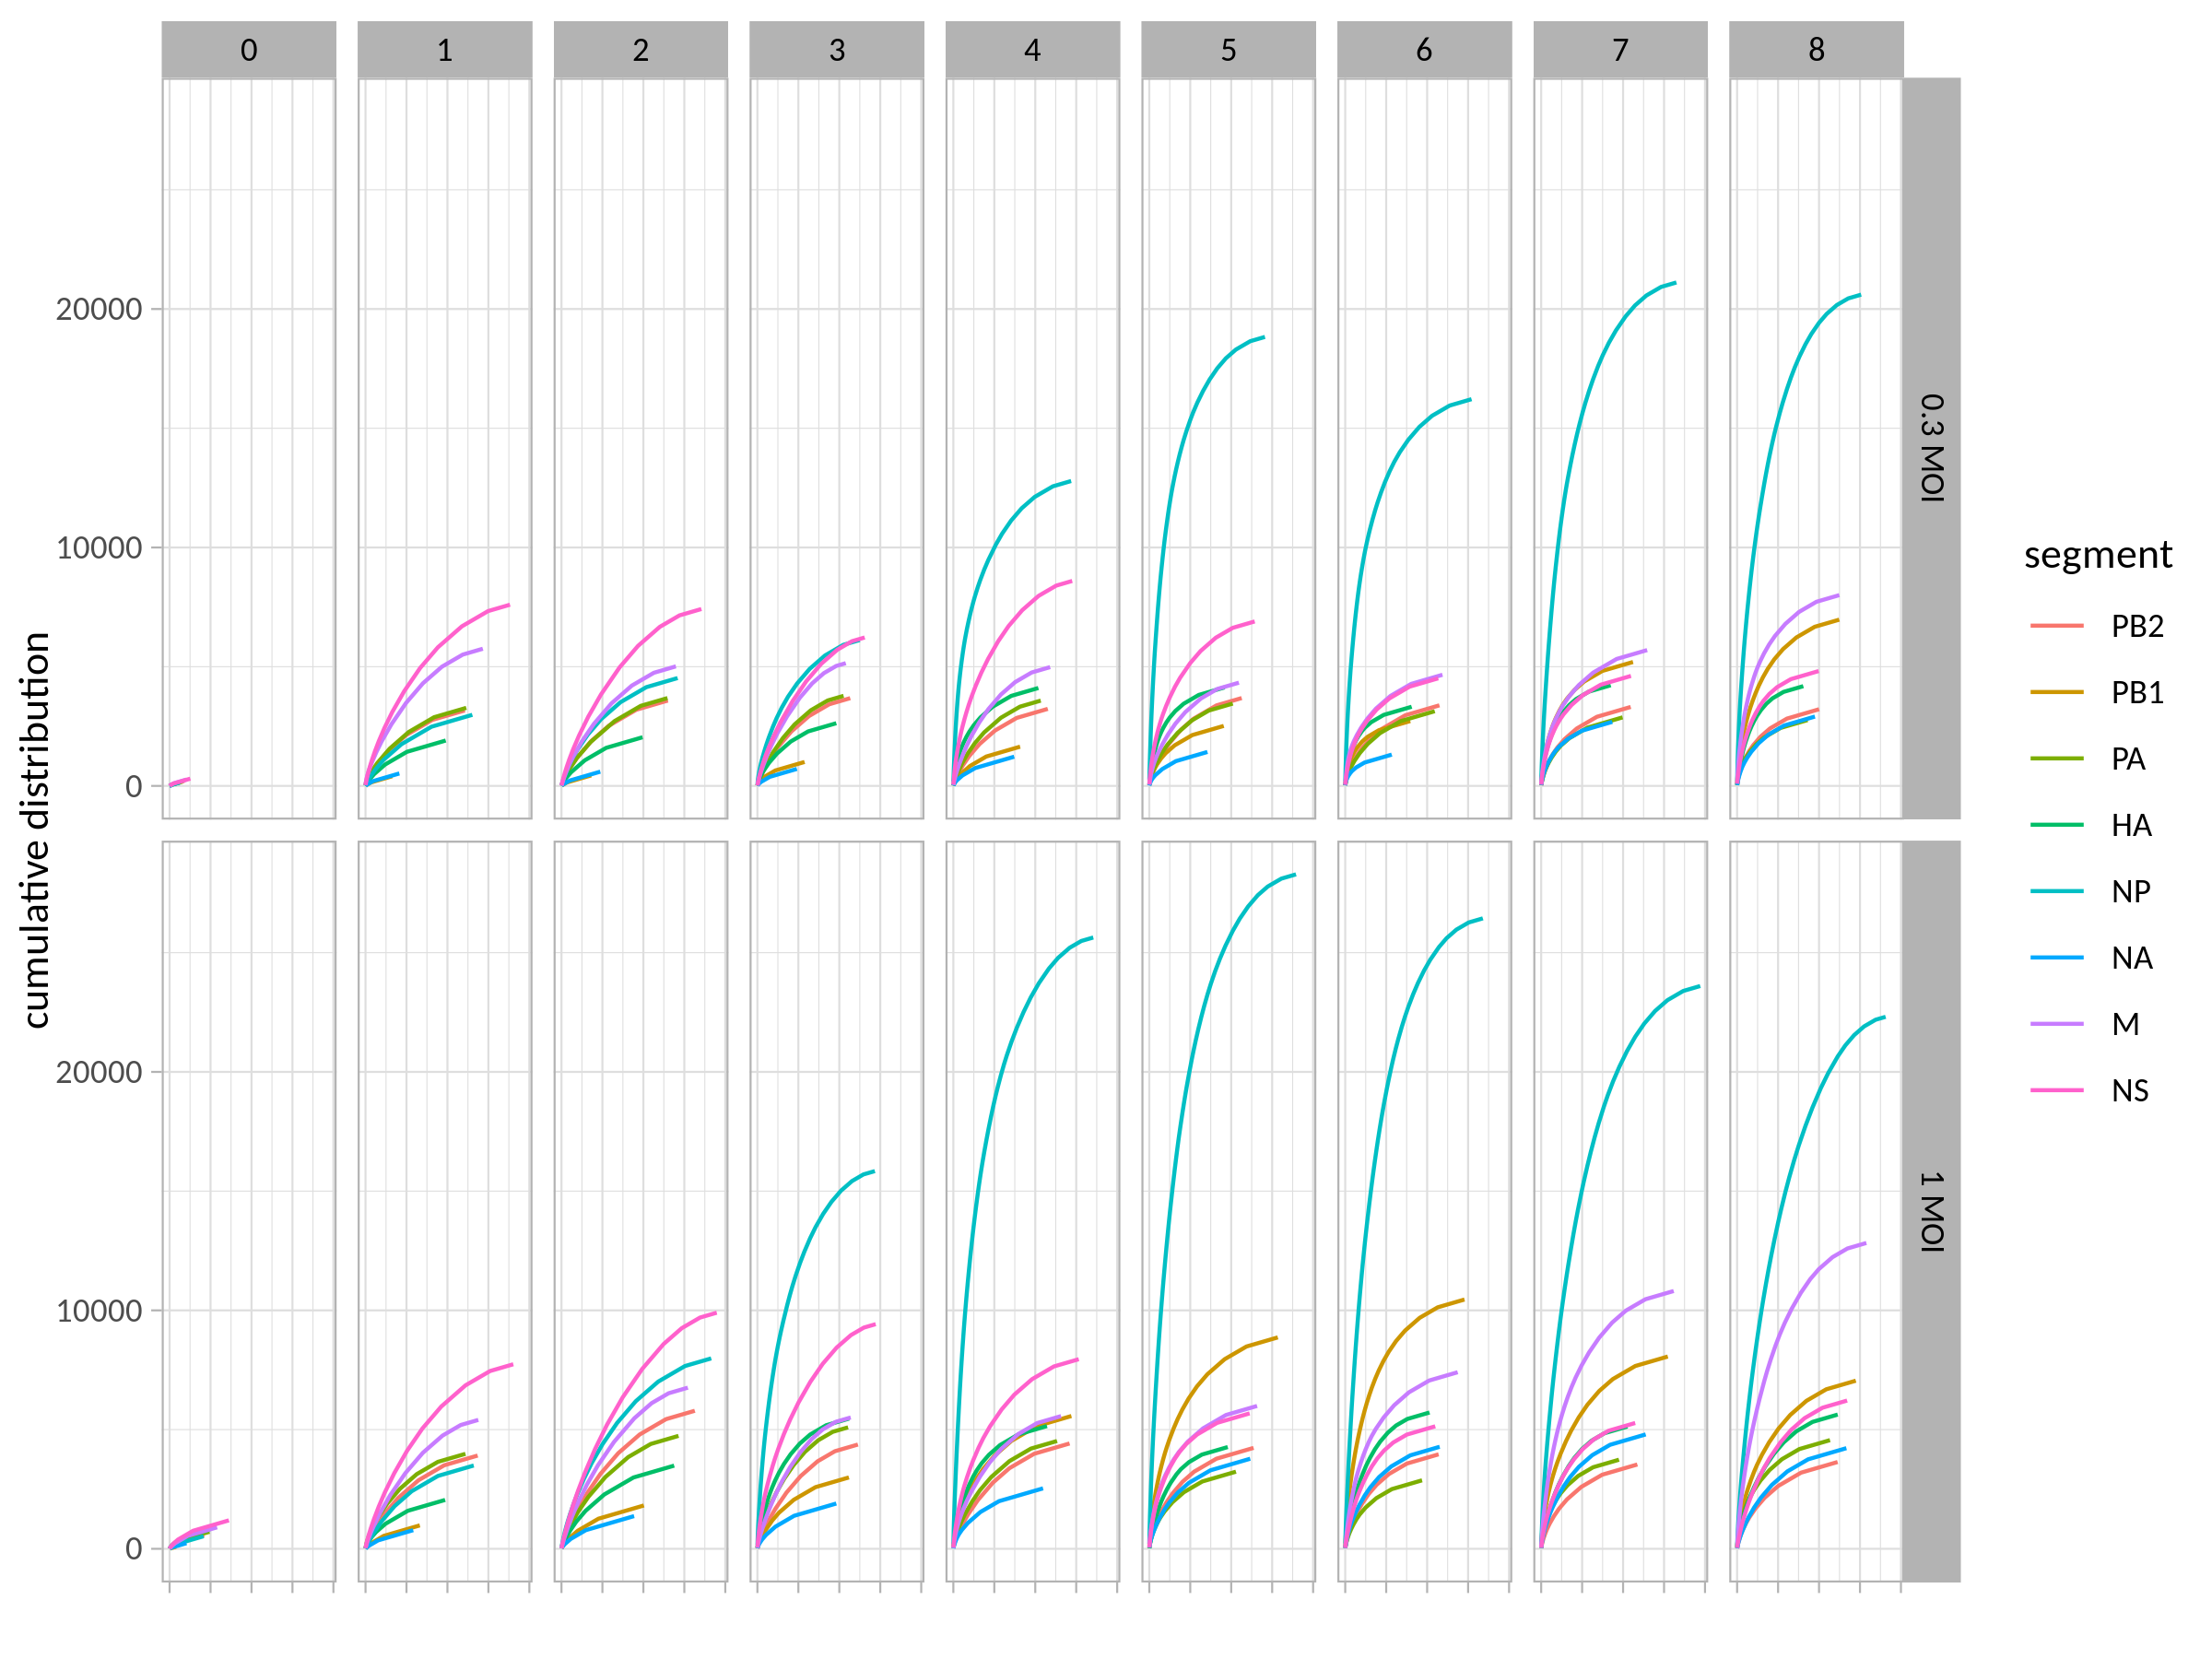

In [15]:
spots_per_cell %>%
  filter(molecule == "mRNA") %>%
  group_by(segment,rep,moi,hpi,fov,cell) %>%
  summarize(n=sum(n)) %>%
  group_by(moi,hpi,segment) %>%
  arrange(-n) %>%
  mutate(cs=cumsum(n),i=row_number()) %>%
  ungroup() %>%
  mutate(moi=str_glue("{moi} MOI")) %>%
  ggplot(aes(i,cs,color=segment)) +
    geom_line() +
    facet_grid(moi ~ hpi) +
    xlab("") + ylab("cumulative distribution") +
    theme(axis.text.x = element_blank())

In [16]:
ggsave("figures/supp-fig10a-mRNA_segment_abundance.svg", width = 8, height = 6, dpi = 300)

### <a id='toc1_3_1_'></a>[Quantitative heterogeneity](#toc0_)

**TODO** add Gini analysis by Redmond (Supp. Fig. 11)

## <a id='toc1_4_'></a>[Distinct segments per cell](#toc0_)

`summarise()` has grouped output by 'rep', 'moi', 'hpi', 'fov', 'molecule'. You
can override using the `.groups` argument.


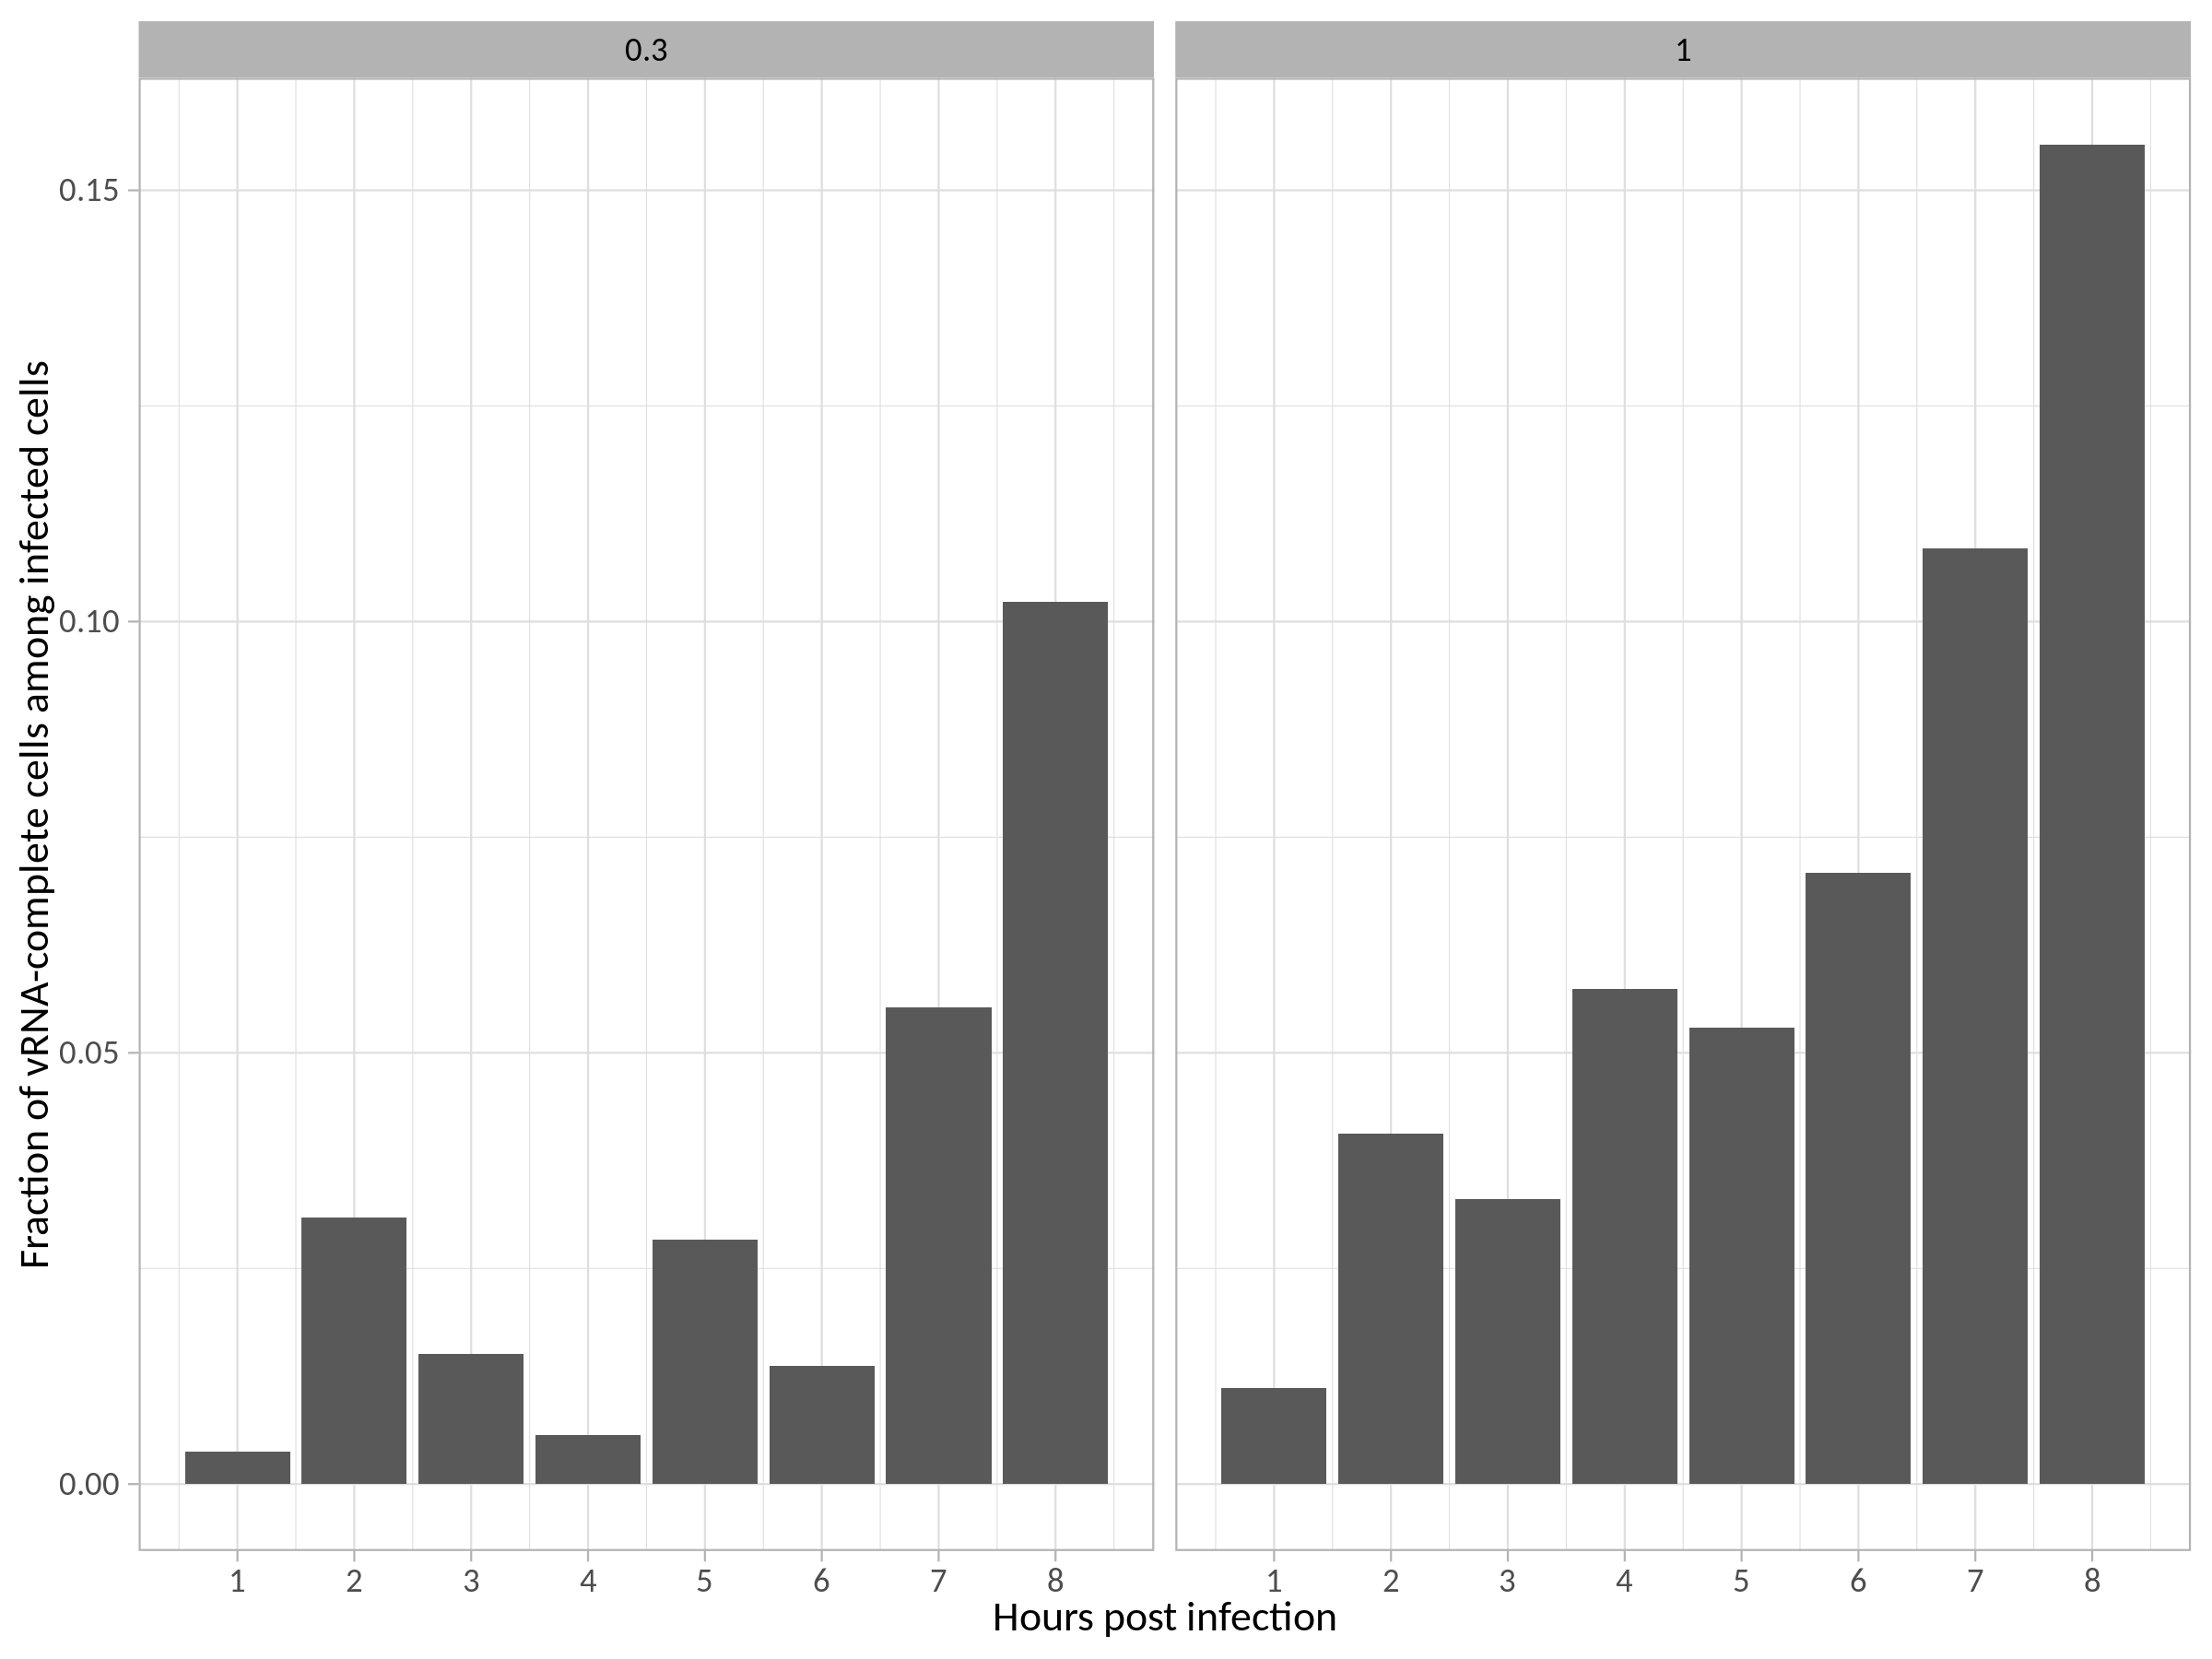

In [17]:
spots_per_cell %>%
  filter(!is.na(molecule)) %>%
  filter(molecule=="vRNA") %>%
	group_by(rep,moi,hpi,fov,molecule,cell) %>%
	summarize(segments=n()) %>%
	group_by(moi,hpi,molecule) %>%
	count(segments, name="Cells") %>%
  mutate(
    segments = fct_rev(if_else(segments==8, "complete", "incomplete")),
    Cells = Cells/sum(Cells)
  ) %>%
  filter(segments == "complete") %>%
	ggplot(aes(x=hpi,y=Cells))+
		geom_col() +
		facet_grid(. ~ moi) +
    scale_fill_brewer(palette = "Set1") +
    xlab("Hours post infection") +
    ylab("Fraction of vRNA-complete cells among infected cells") +
    scale_x_continuous(breaks=seq(0,8,1))

`summarise()` has grouped output by 'rep', 'moi', 'hpi', 'fov', 'molecule'. You
can override using the `.groups` argument.


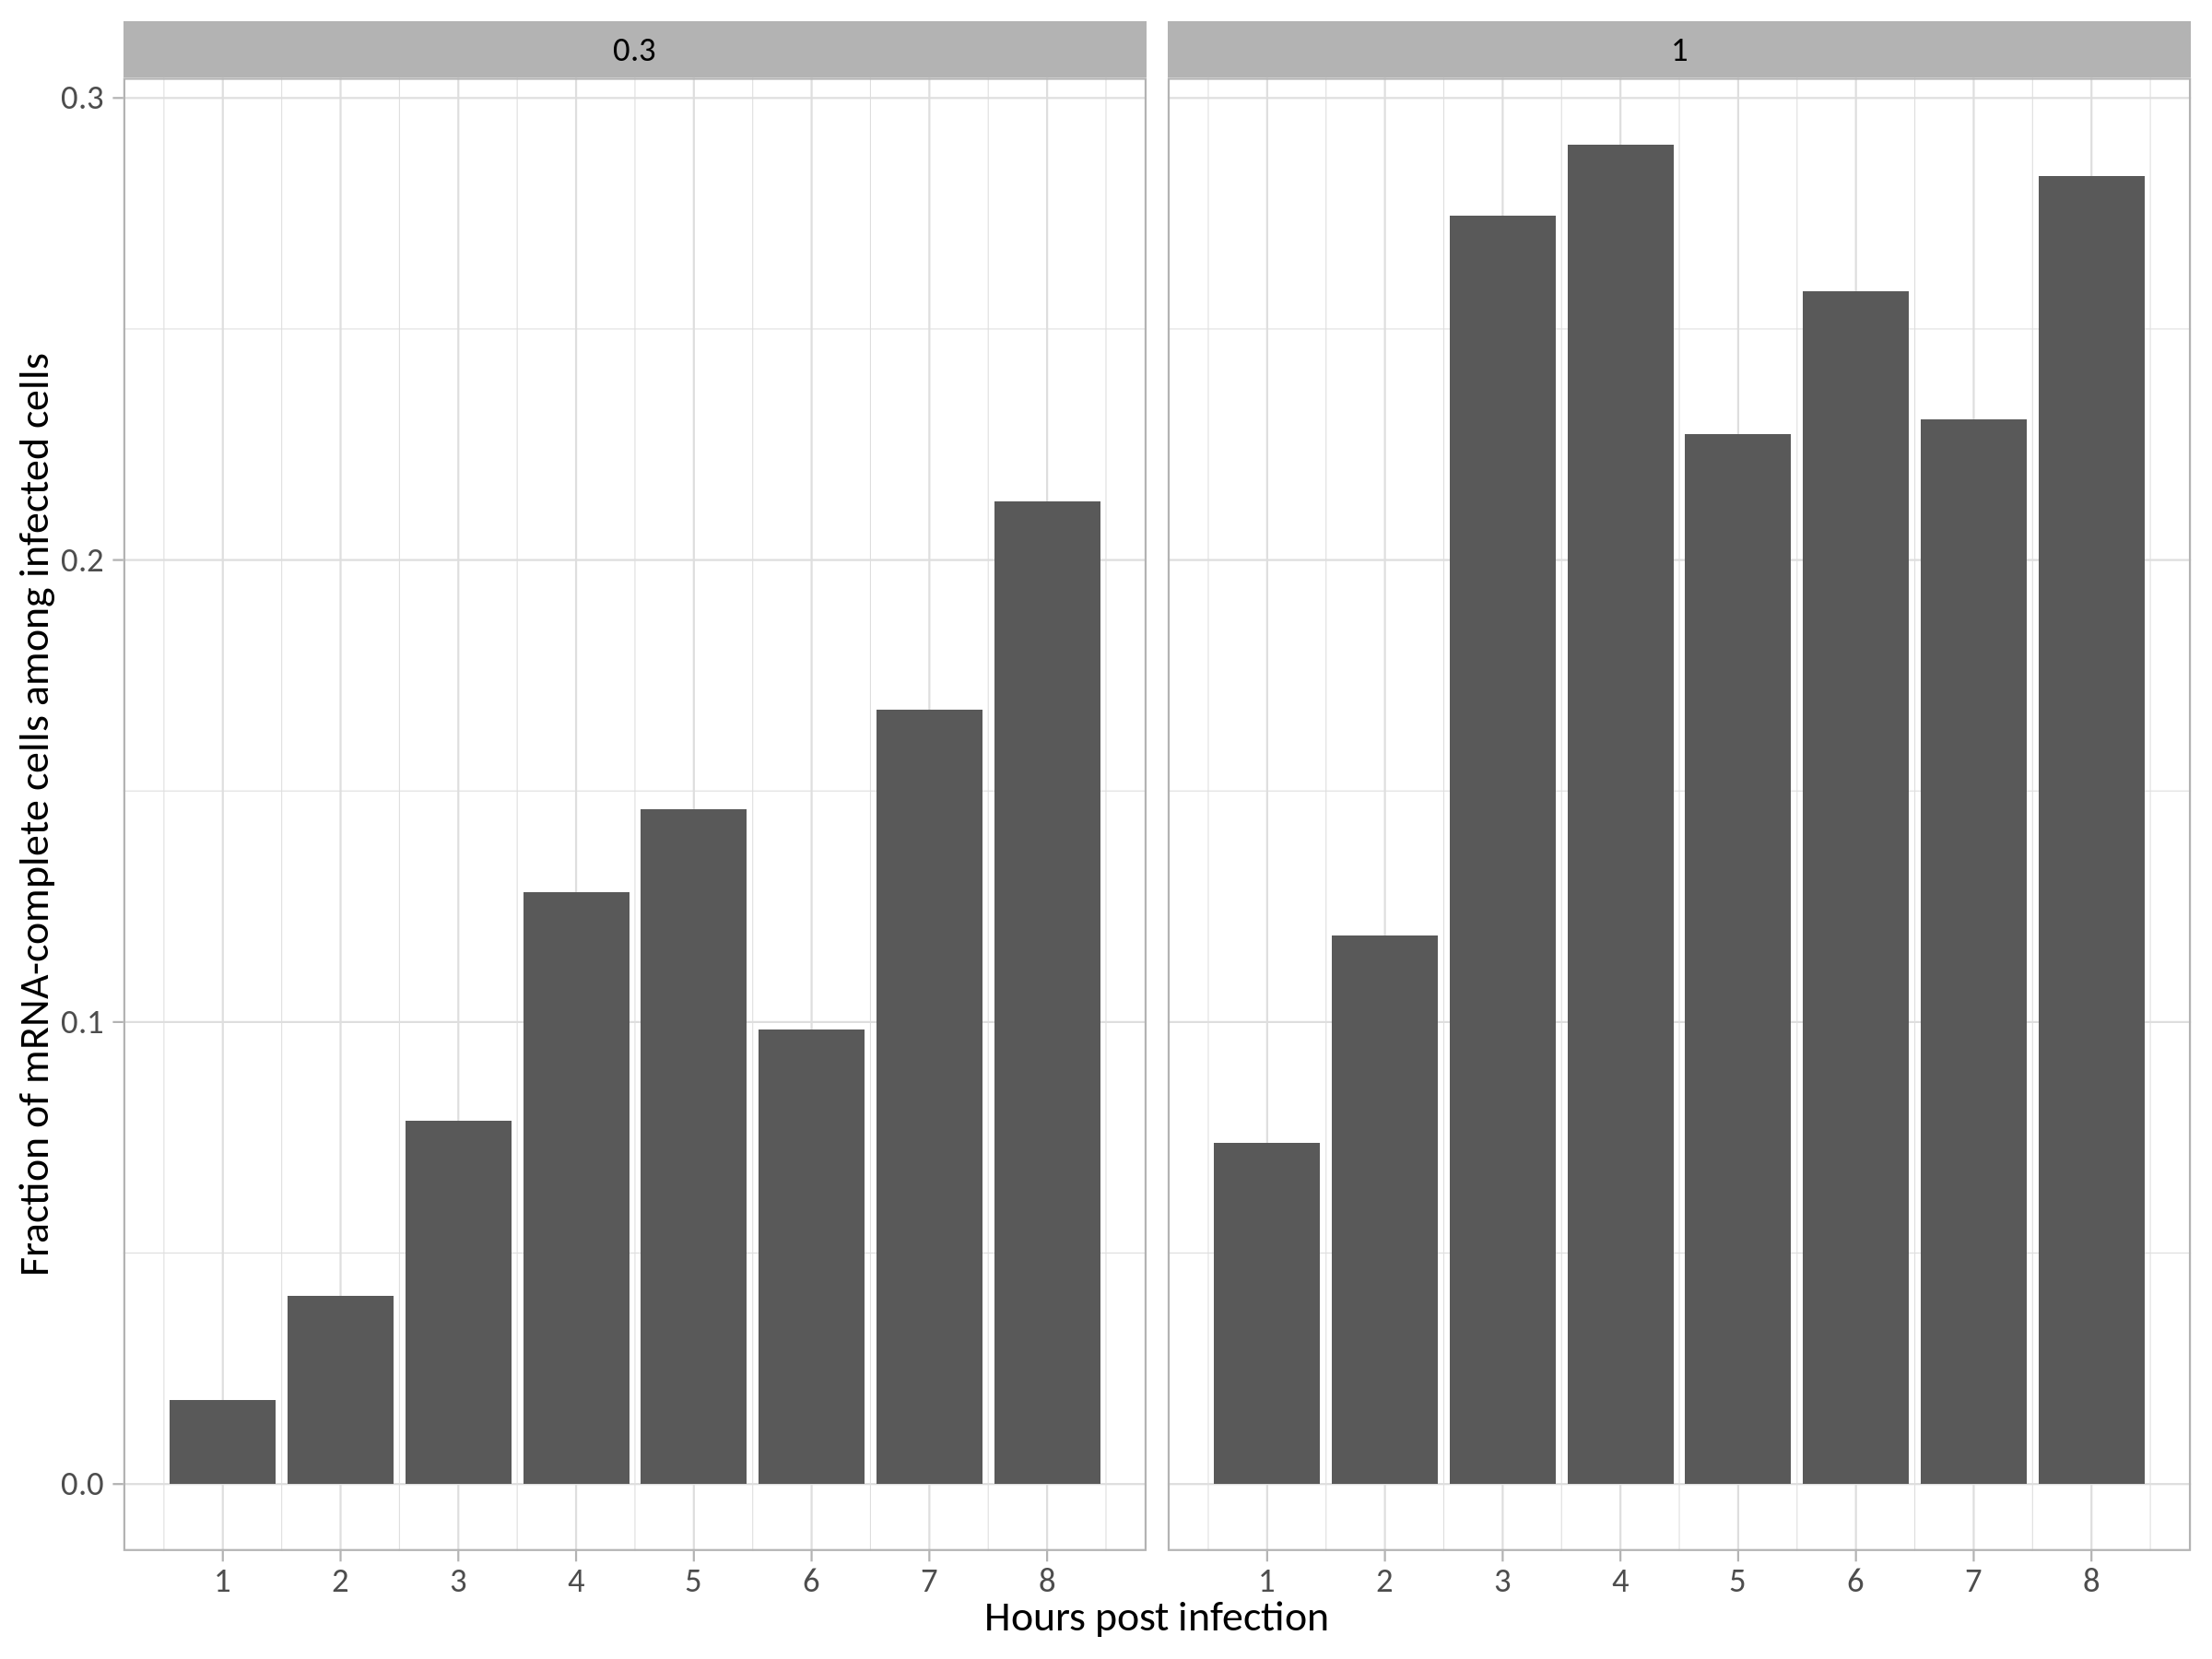

In [18]:
spots_per_cell %>%
  filter(!is.na(molecule)) %>%
  filter(molecule=="mRNA") %>%
	group_by(rep,moi,hpi,fov,molecule,cell) %>%
	summarize(segments=n()) %>%
	group_by(moi,hpi,molecule) %>%
	count(segments, name="Cells") %>%
  mutate(
    segments = fct_rev(if_else(segments==8, "complete", "incomplete")),
    Cells = Cells/sum(Cells)
  ) %>%
  filter(segments == "complete") %>%
	ggplot(aes(x=hpi,y=Cells))+
		geom_col() +
		facet_grid(. ~ moi) +
    scale_fill_brewer(palette = "Set1") +
    xlab("Hours post infection") +
    ylab("Fraction of mRNA-complete cells among infected cells") +
    scale_x_continuous(breaks=seq(0,8,1))

In [19]:
spots_per_cell %>%
  filter(!is.na(molecule)) %>%
	group_by(rep,moi,hpi,fov,molecule,cell) %>%
	summarize(segments=n()) %>%
	group_by(moi,molecule) %>%
	count(segments, name="Cells") %>%
  mutate(
    segments = fct_rev(if_else(segments==8, "complete", "incomplete")),
    Cells = Cells/sum(Cells)
  ) %>%
  filter(segments == "complete")

`summarise()` has grouped output by 'rep', 'moi', 'hpi', 'fov', 'molecule'. You
can override using the `.groups` argument.


moi,molecule,segments,Cells
<fct>,<fct>,<fct>,<dbl>
0.3,mRNA,complete,0.10457005
0.3,vRNA,complete,0.03065275
1,mRNA,complete,0.19954828
1,vRNA,complete,0.06210466


`summarise()` has grouped output by 'rep', 'moi', 'hpi', 'fov'. You can
override using the `.groups` argument.


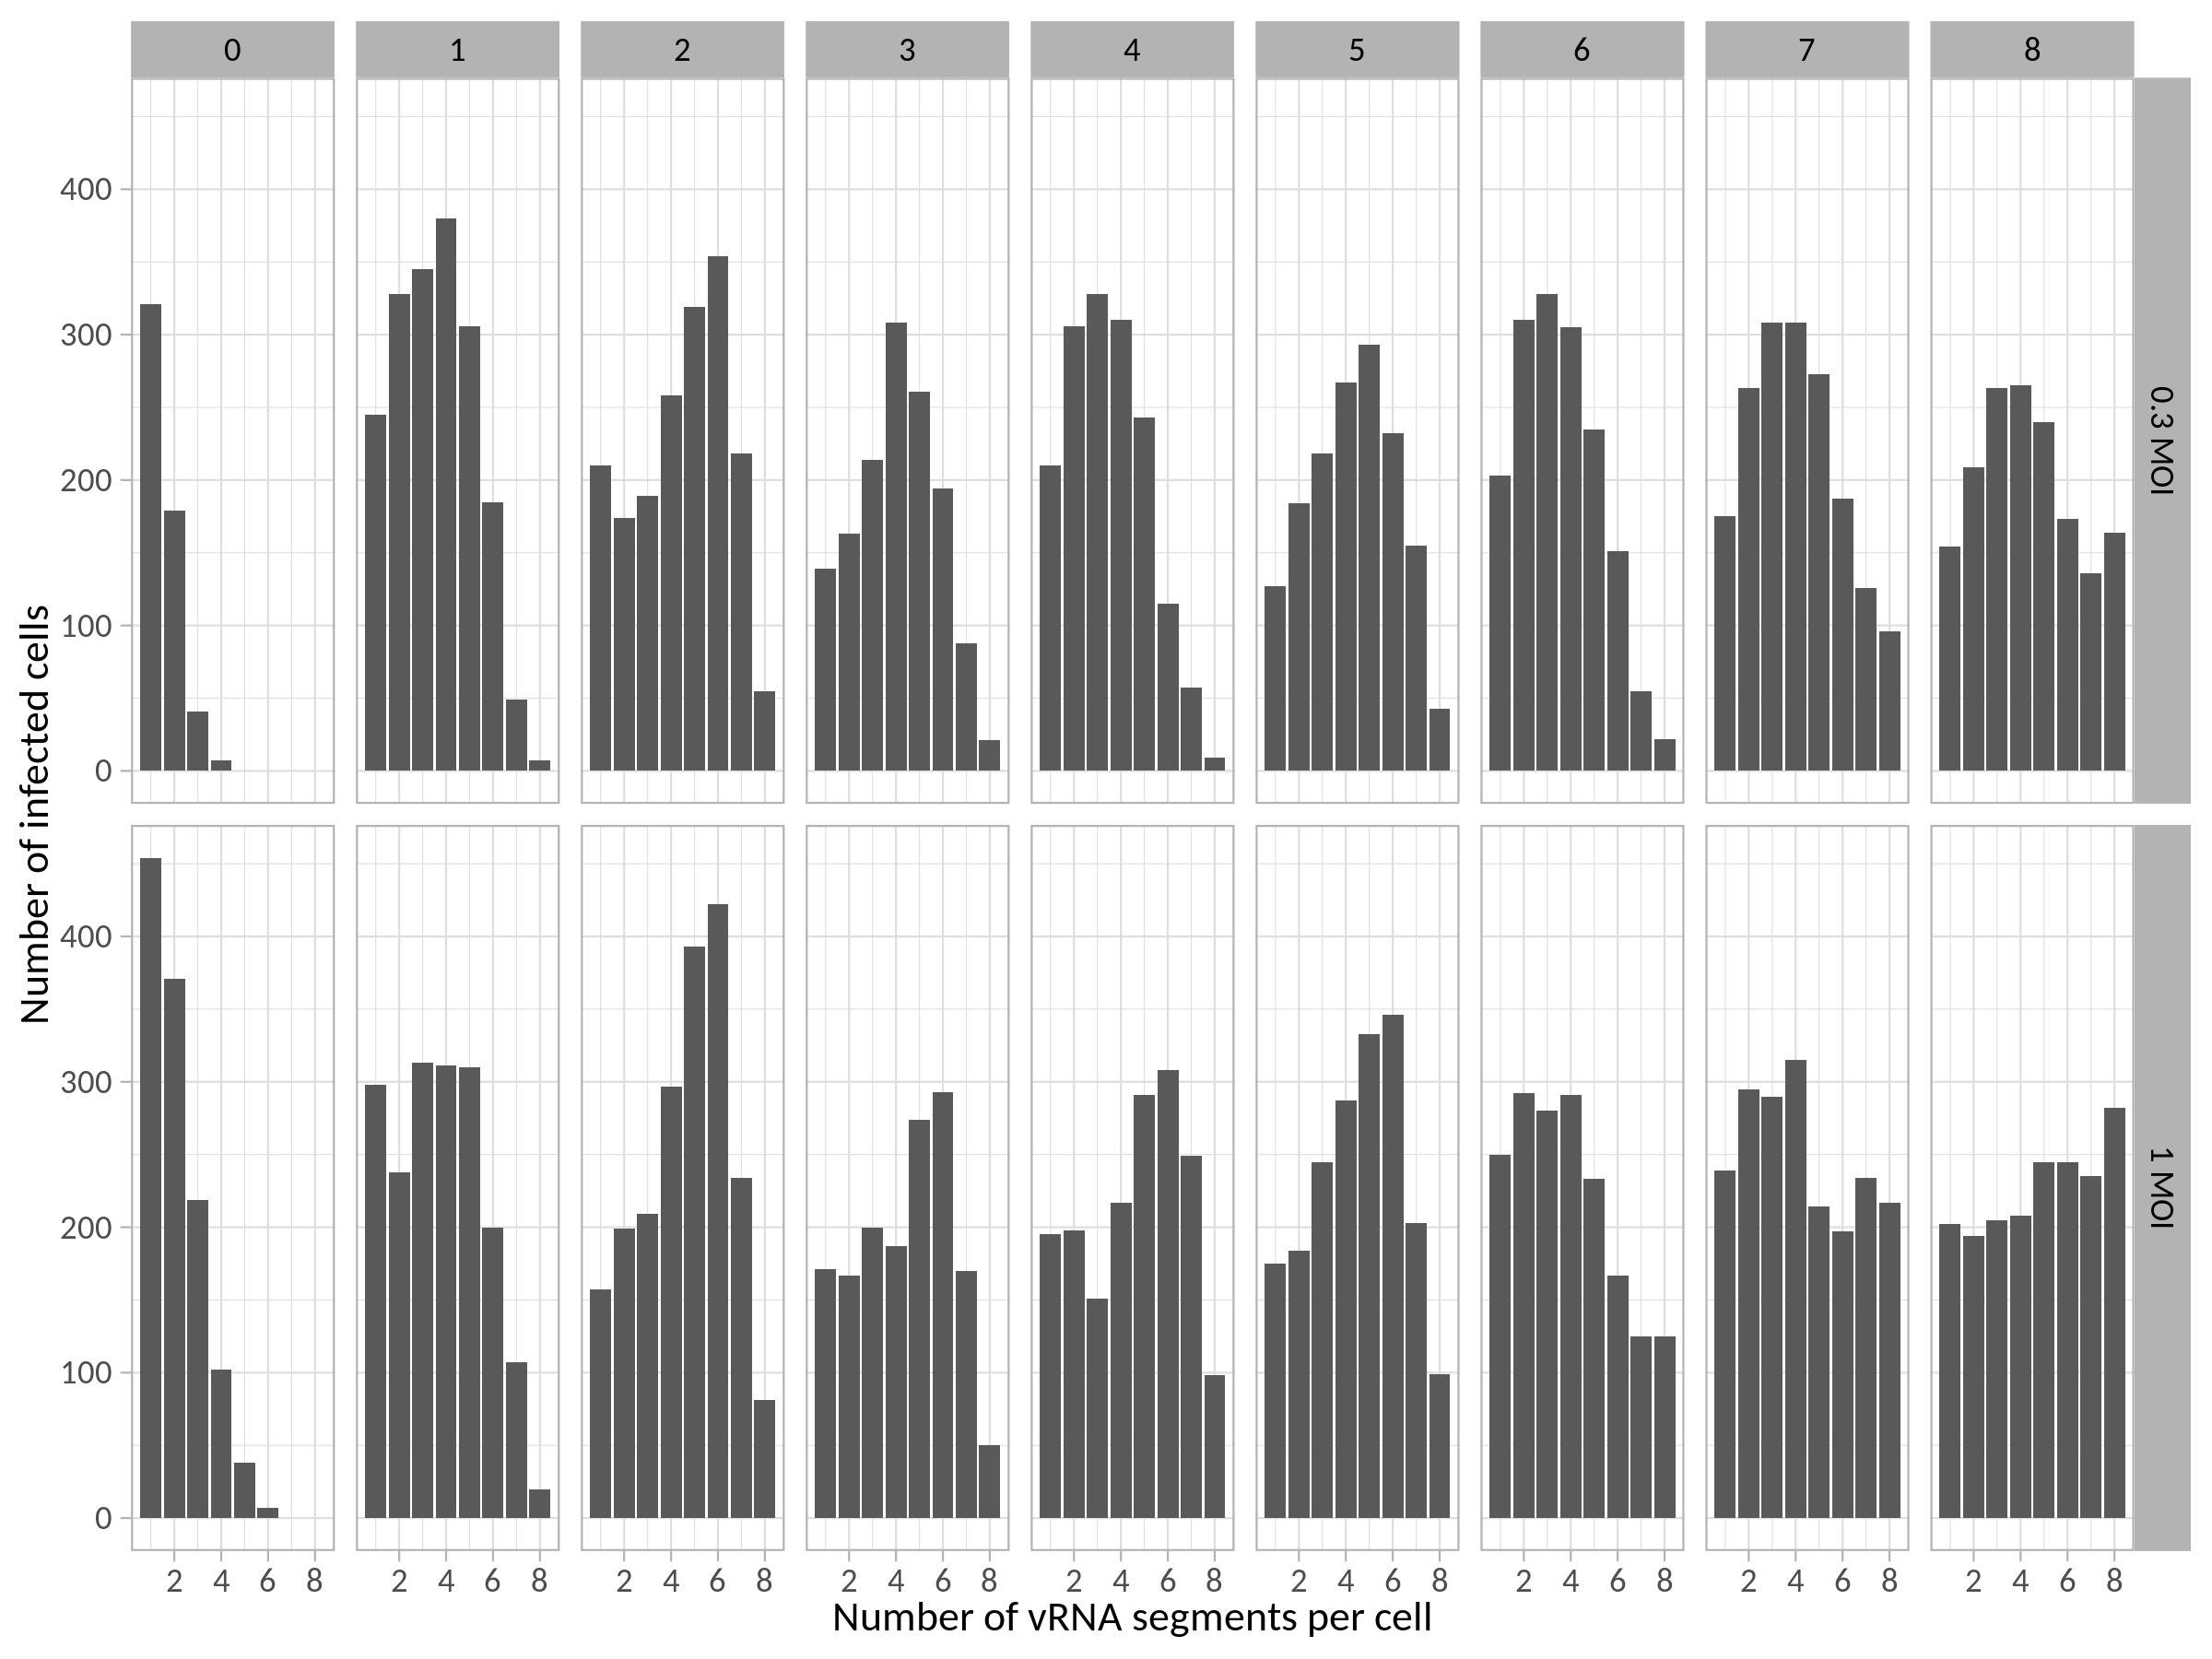

In [20]:
spots_per_cell %>%
	filter(molecule	== "vRNA") %>%
	group_by(rep,moi,hpi,fov,cell) %>%
	summarize(segments=n()) %>%
	group_by(moi,hpi) %>%
	count(segments, name="Cells") %>%
  ungroup %>%
  mutate(moi=str_glue("{moi} MOI")) %T>%
  write_tsv("figures/supp-fig12a-distinct-vRNA-per-cell.tsv") %>%
	ggplot(aes(segments,Cells)) +
		geom_col() +
		facet_grid(moi ~ hpi) +
    xlab("Number of vRNA segments per cell") +
    ylab("Number of infected cells")

In [21]:
ggsave("figures/supp-fig12a-distinct-vRNA-per-cell.svg", width = 8, height = 6, dpi = 300)

`summarise()` has grouped output by 'rep', 'moi', 'hpi', 'fov'. You can
override using the `.groups` argument.


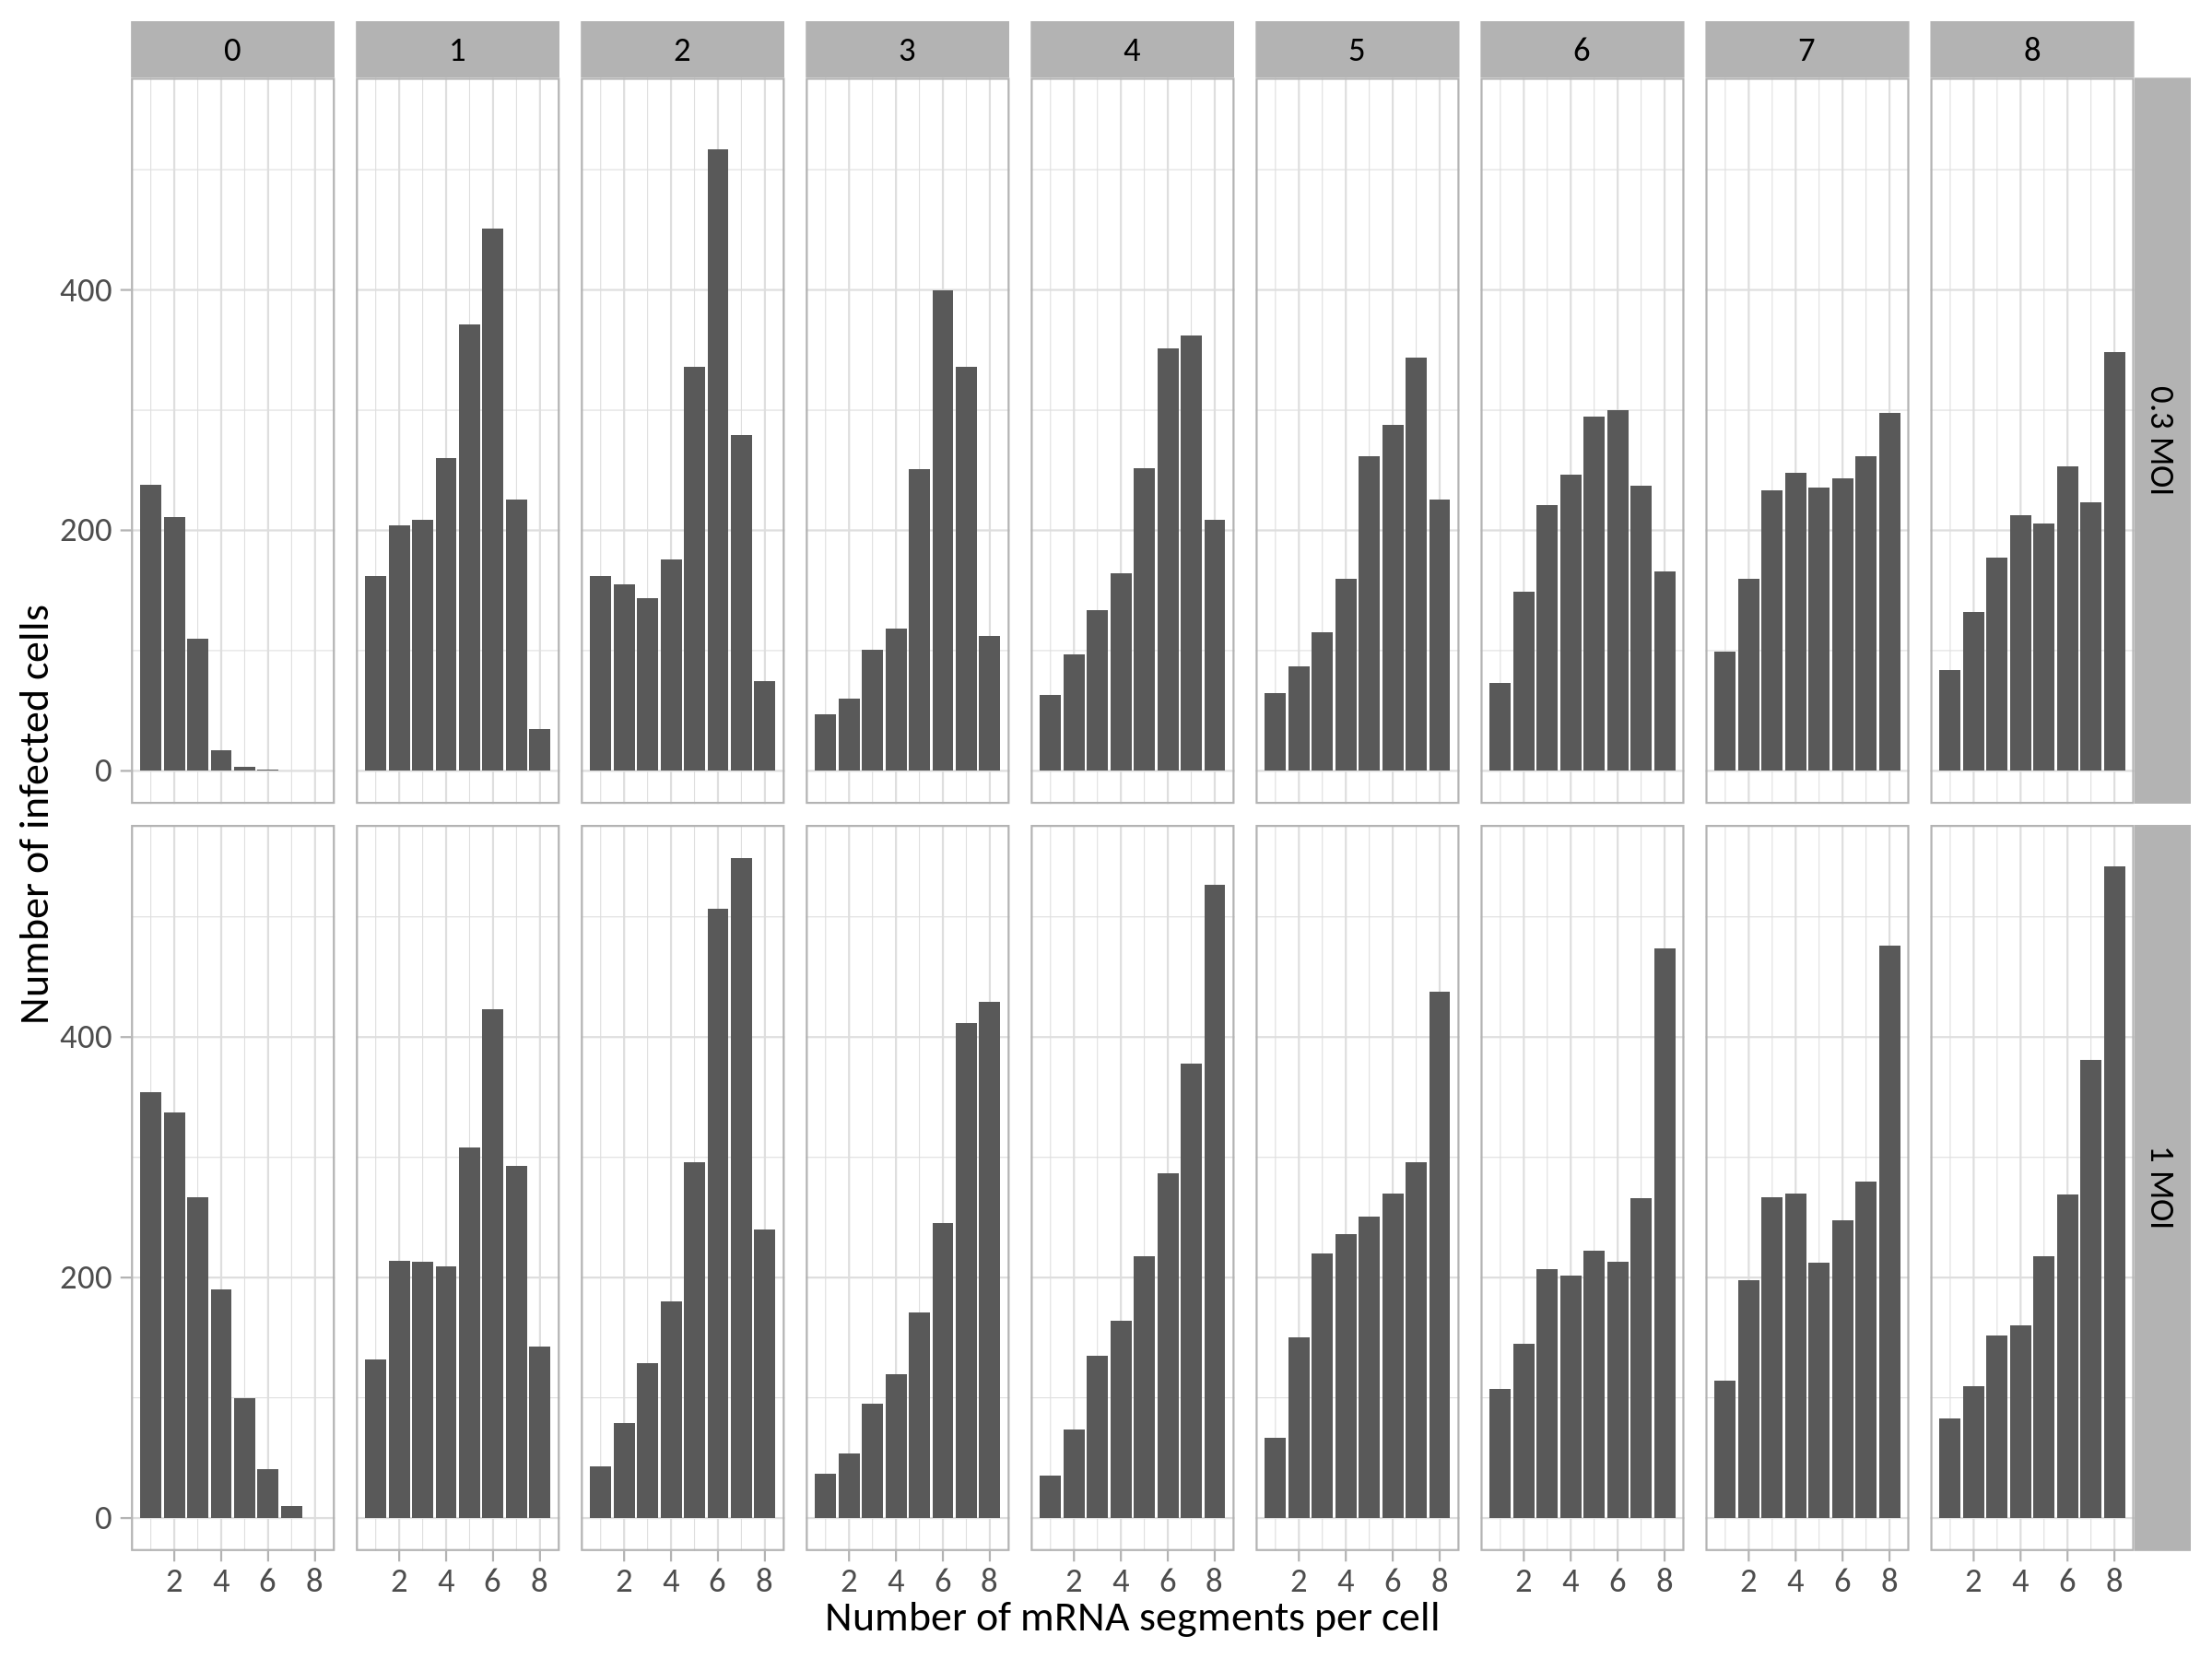

In [22]:
spots_per_cell %>%
	filter(molecule	== "mRNA") %>%
	group_by(rep,moi,hpi,fov,cell) %>%
	summarize(segments=n()) %>%
	group_by(moi,hpi) %>%
	count(segments, name="Cells") %>%
  ungroup %>%
  mutate(moi=str_glue("{moi} MOI")) %T>%
  write_tsv("figures/supp-fig12b-distinct-mRNA-per-cell.tsv") %>%
	ggplot(aes(segments,Cells)) +
		geom_col() +
		facet_grid(moi ~ hpi) +
    xlab("Number of mRNA segments per cell") +
    ylab("Number of infected cells")

In [23]:
ggsave("figures/supp-fig12b-distinct-mRNA-per-cell.svg", width = 8, height = 6, dpi = 300)

## <a id='toc1_5_'></a>[Pattern of vRNA in mRNA abundant cells](#toc0_)

In [24]:
spots_wide <- spots_per_cell %>%
  group_by(cell) %>%
  filter(!(segment %in% c("missing","multi"))) %>%
  mutate(
    total = sum(n),                                      # total number of spots
    vRNA = sum(if_else(molecule == "vRNA", n, 0)),       # total number of vRNA spots
    vRNAs = length(unique(segment[molecule == "vRNA"])), # number of distinct vRNA segments
    mRNA = sum(if_else(molecule == "mRNA", n, 0)),       # total number of mRNA spots
    mRNAs = length(unique(segment[molecule == "mRNA"])), # number of distinct mRNA segments
    NS_mRNA = sum(n[molecule=="mRNA" & segment=="NS"]),  # number of NS mRNA spots
  ) %>%
  ungroup() %>%
  pivot_wider(names_from=c("molecule","segment"), values_from="n") %>%
  arrange(-total)

In [25]:
spots_wide_cytonuc <- spots_per_cell_cytonuc %>%
  group_by(cell, localisation) %>%
  filter(!(segment %in% c("missing","multi"))) %>%
  mutate(
    total = sum(n),                                      # total number of spots
    vRNA = sum(if_else(molecule == "vRNA", n, 0)),       # total number of vRNA spots
    vRNAs = length(unique(segment[molecule == "vRNA"])), # number of distinct vRNA segments
    mRNA = sum(if_else(molecule == "mRNA", n, 0)),       # total number of mRNA spots
    mRNAs = length(unique(segment[molecule == "mRNA"])), # number of distinct mRNA segments
    NS_mRNA = sum(n[molecule=="mRNA" & segment=="NS"]),  # number of NS mRNA spots
  ) %>%
  ungroup() %>%
  pivot_wider(names_from=c("molecule","segment"), values_from="n") %>%
  arrange(-total)

### <a id='toc1_5_1_'></a>[vRNA spot counts vs mRNA spot counts](#toc0_)

#### <a id='toc1_5_1_1_'></a>[All cells](#toc0_)

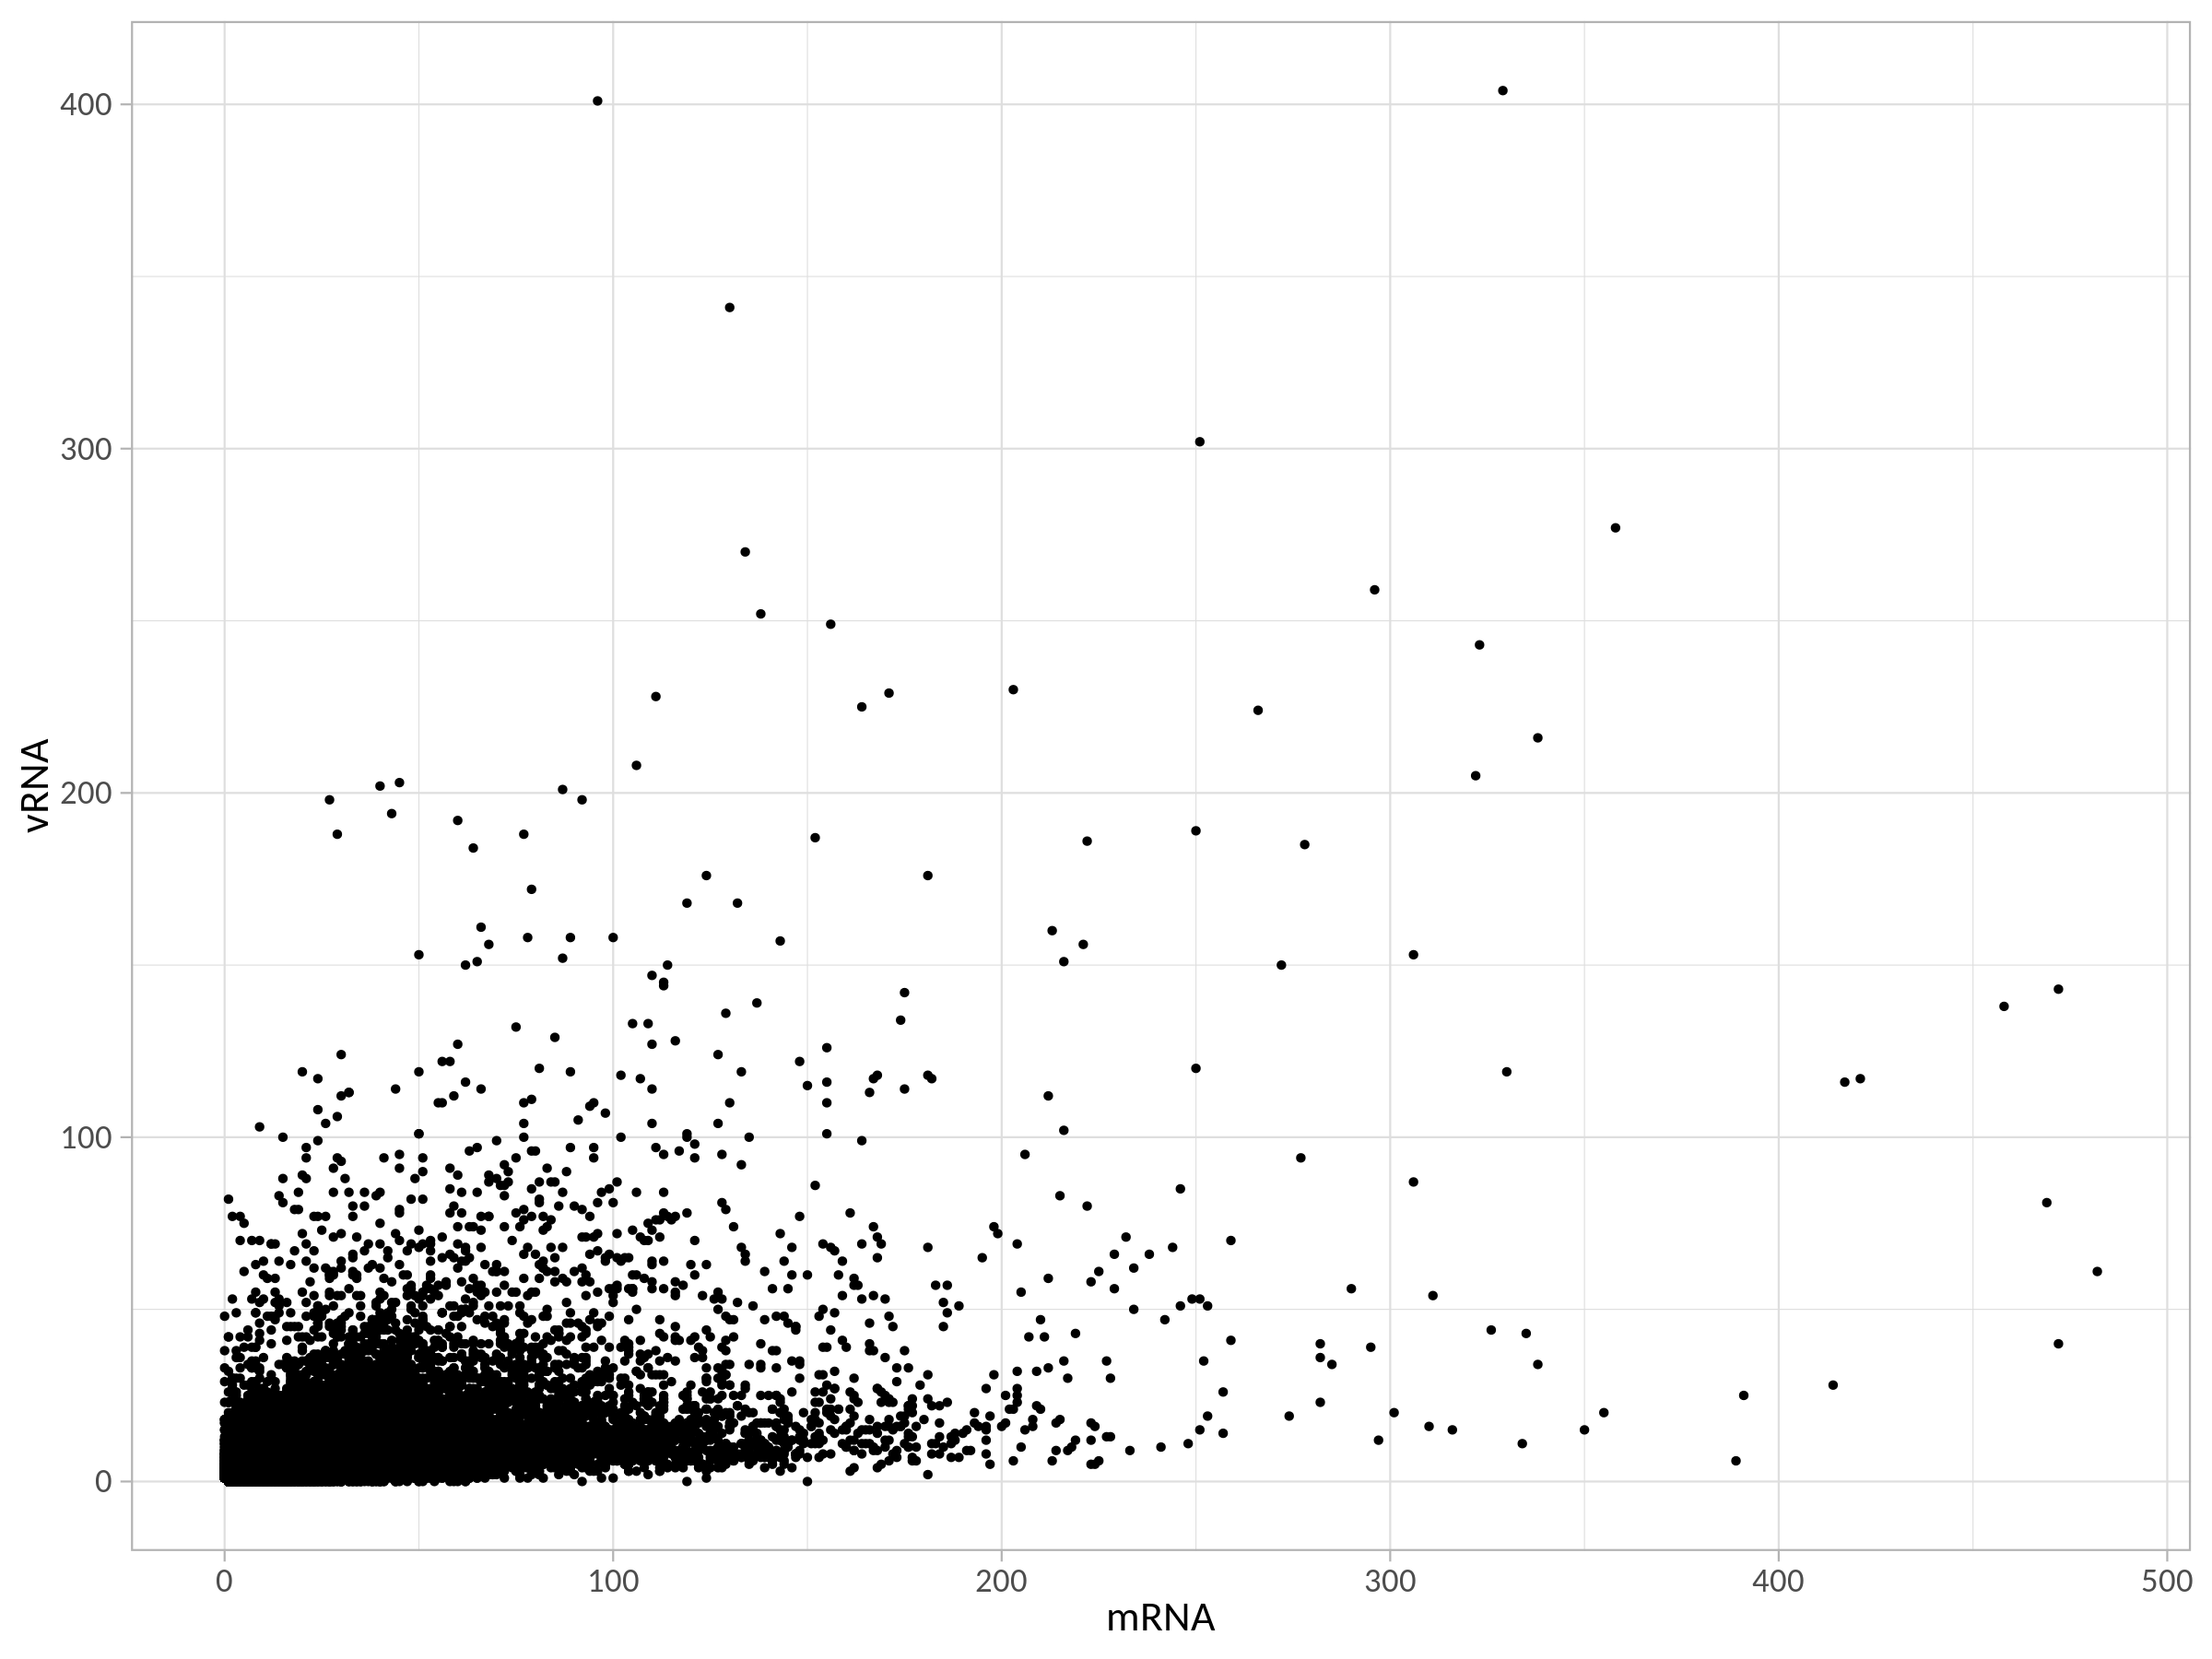

In [26]:
spots_wide %>%
  #filter(total>100) %>%
  mutate(NS_mRNA = if_else(NS_mRNA > 0,"present","absent")) %>%
  ggplot(aes(x=mRNA, y=vRNA)) +
      geom_point(size=.5)

#### <a id='toc1_5_1_2_'></a>[cells with all 8 mRNAs](#toc0_)

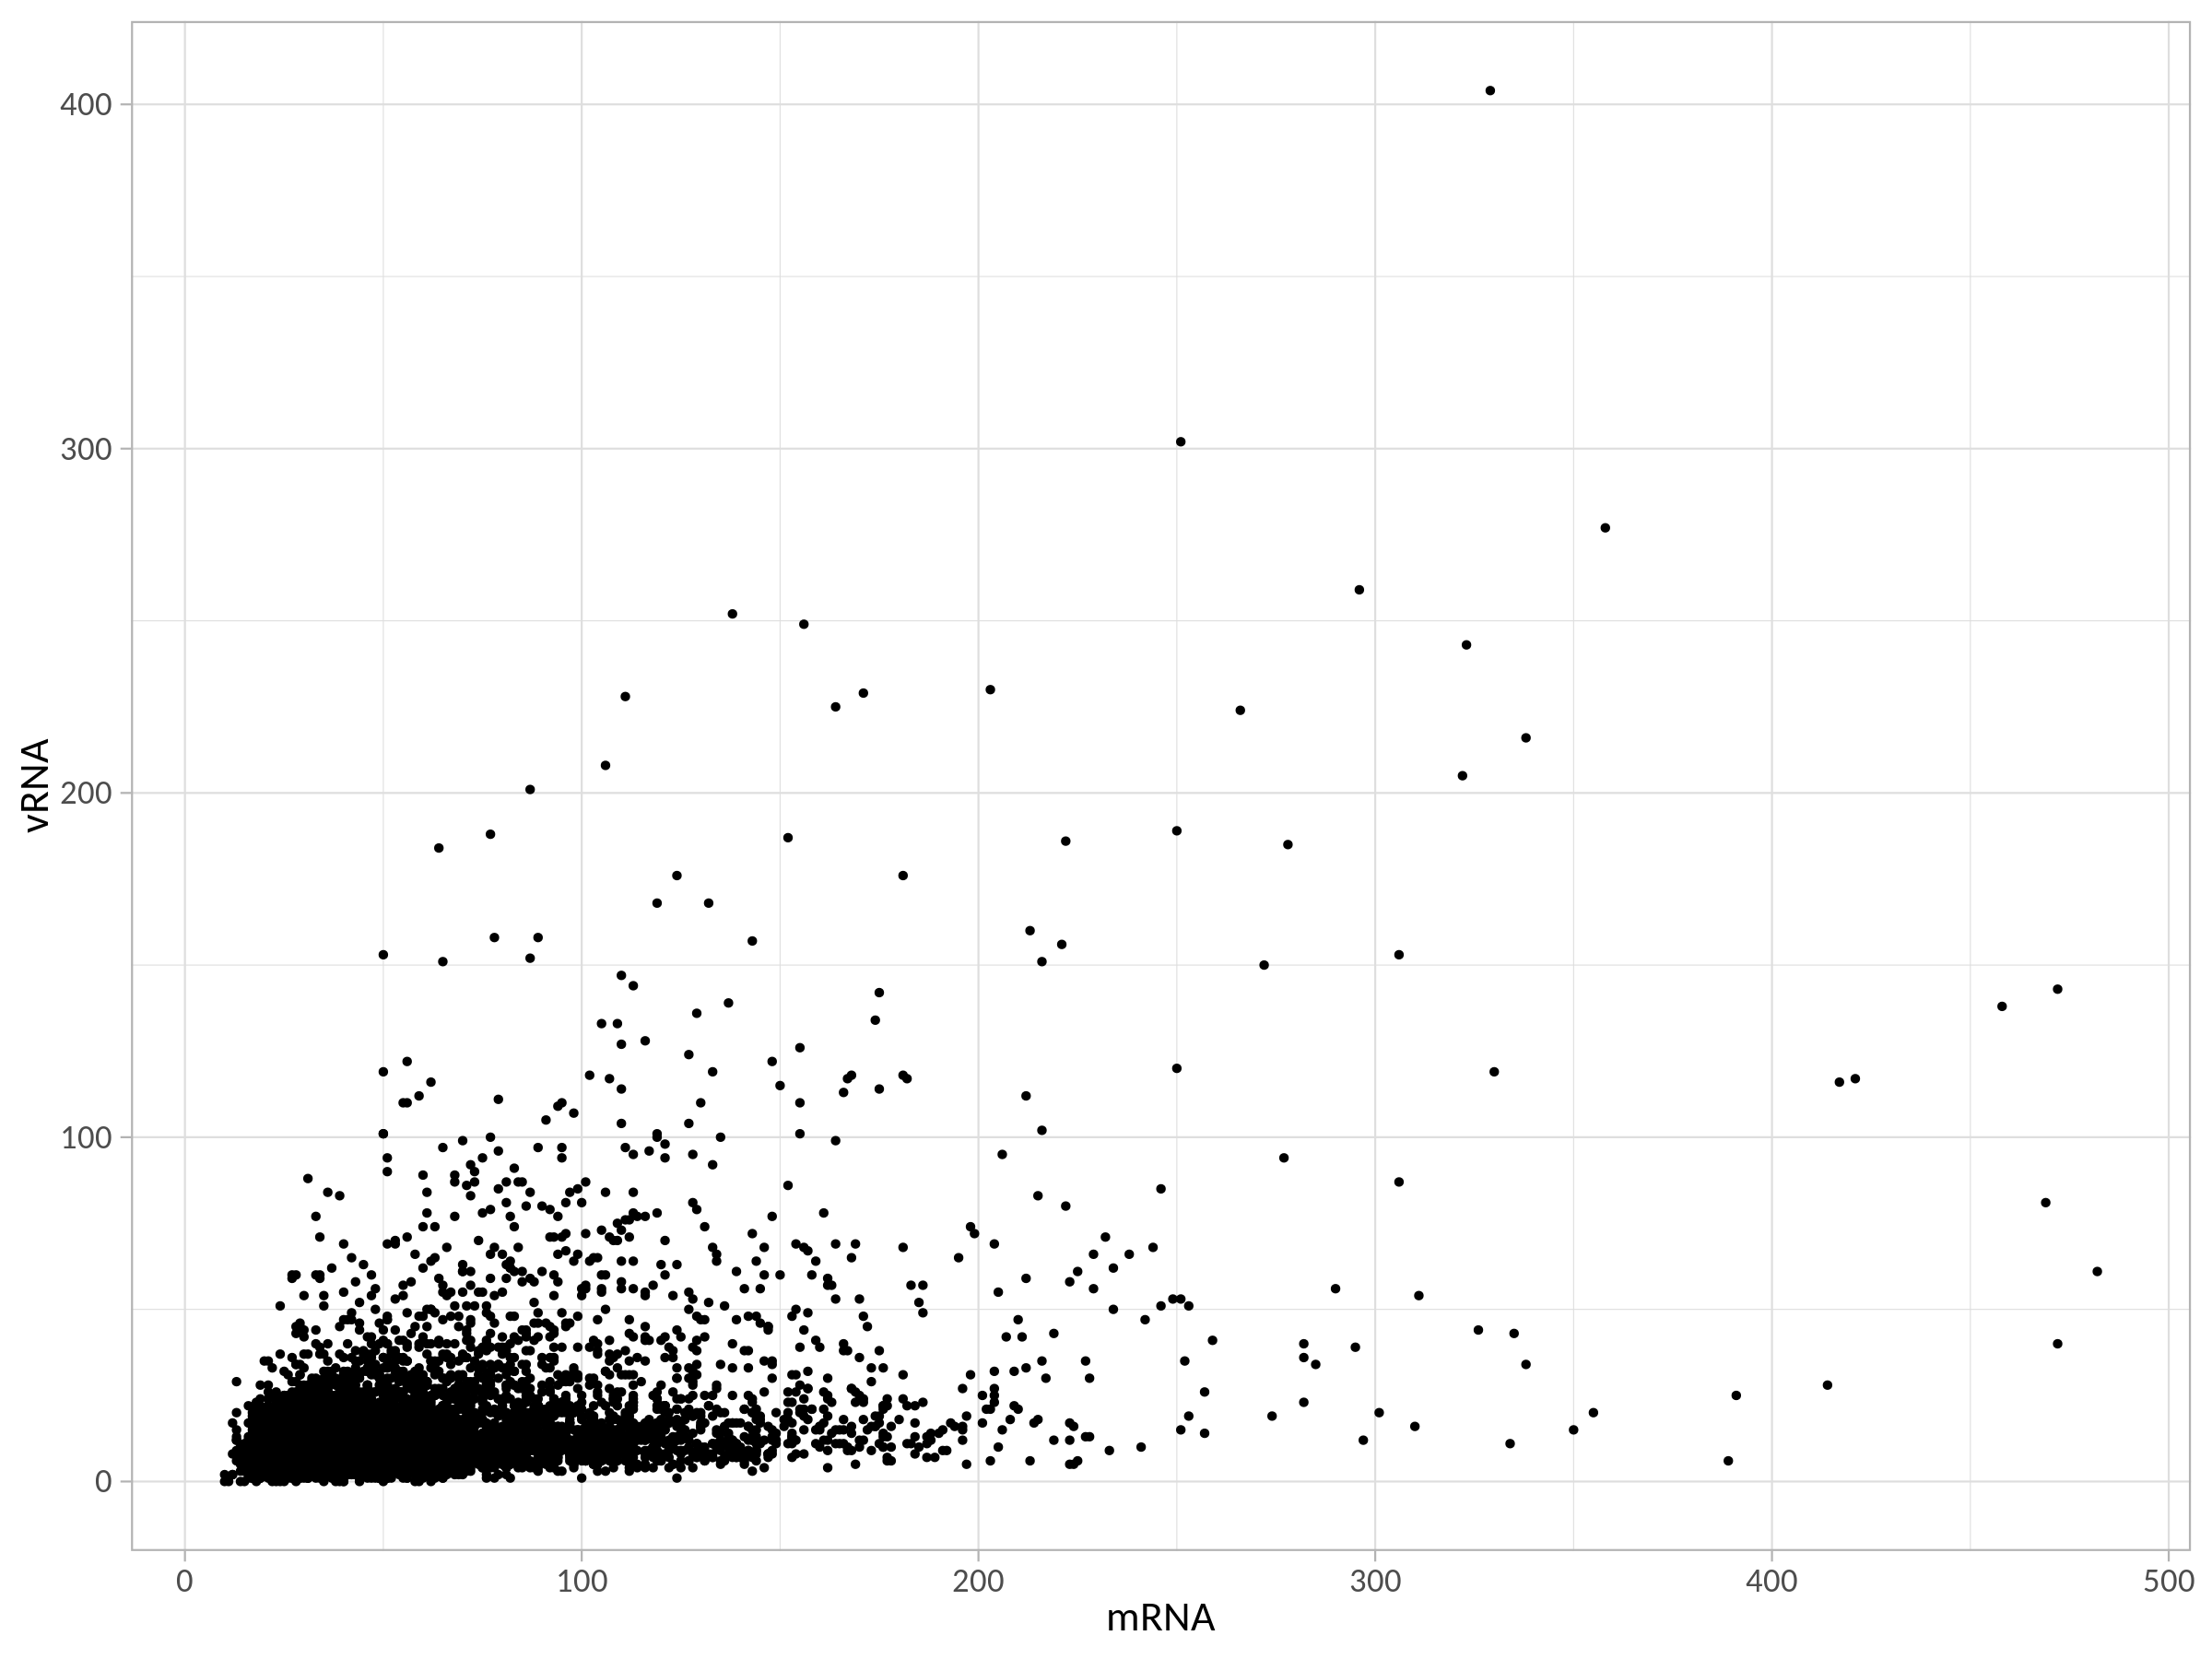

In [27]:
spots_wide %>%
  filter(mRNAs==8) %>%
  mutate(NS_mRNA = if_else(NS_mRNA > 0,"present","absent")) %>%
  ggplot(aes(x=mRNA, y=vRNA)) +
      theme(text = element_text(family = "Calibri"), strip.text = element_text(colour = 'black')) +
      geom_point(size=.5)

## <a id='toc1_6_'></a>[Specific Questions](#toc0_)

### <a id='toc1_6_1_'></a>[Is there an association between a particular segment and high vRNA expression?](#toc0_)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 121 rows containing missing values or values outside the scale range
(`geom_bar()`).”


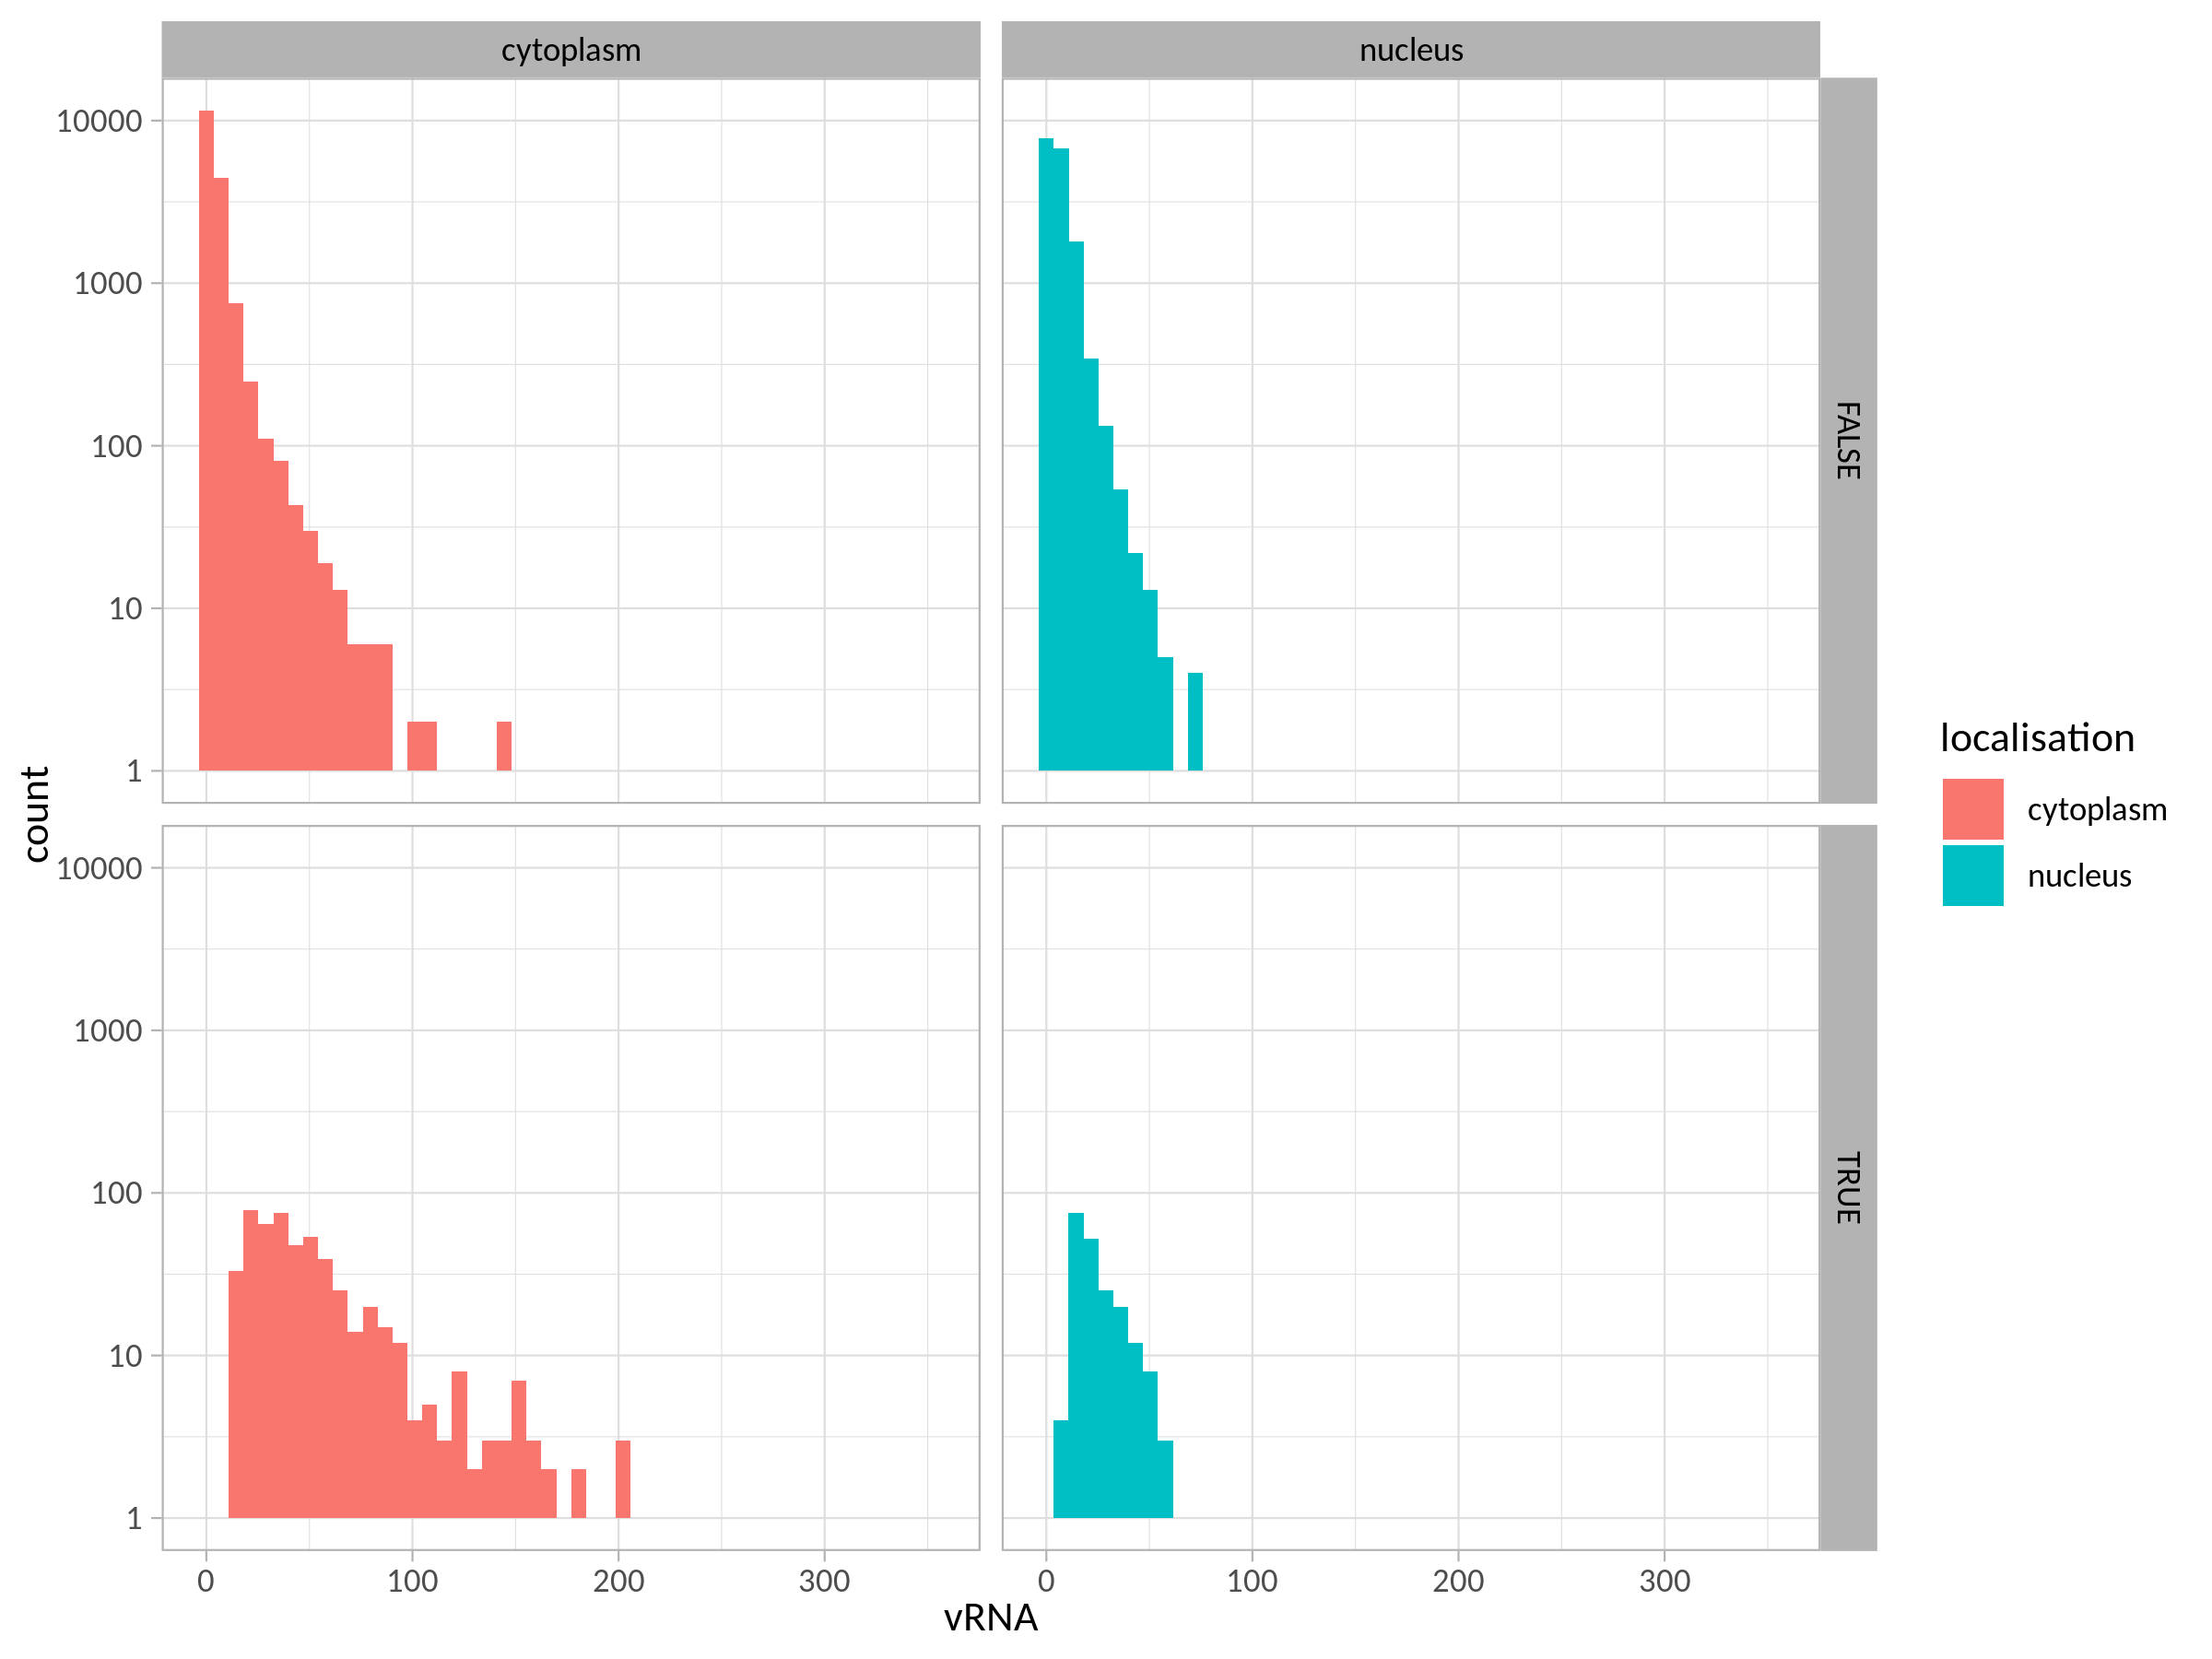

In [28]:
spots_wide_cytonuc %>%
  filter(hpi>=4) %>%
  ggplot(aes(vRNA, fill=localisation)) +
    geom_histogram(bins=50) +
    facet_grid(vRNAs==8 ~ localisation) +
    scale_y_log10()

In [29]:
spots_wide_highV <- spots_wide_cytonuc %>%
  filter(hpi>=0, localisation=="cytoplasm", vRNA>=40, mRNAs >= 6, vRNAs >= 0) %>%
  mutate(high_vRNA = vRNA > 100) %>%
  pivot_longer(names_to="molecule_segment", values_to="count", contains("RNA_")) %>%
  separate(molecule_segment, into=c("molecule","segment"), sep="_") %>%
  mutate(segment=fct_relevel(segment, segment_order)) %>%
  replace_na(list(count=0))

In [30]:
n_distinct(spots_wide_highV$cell)

[1] 363

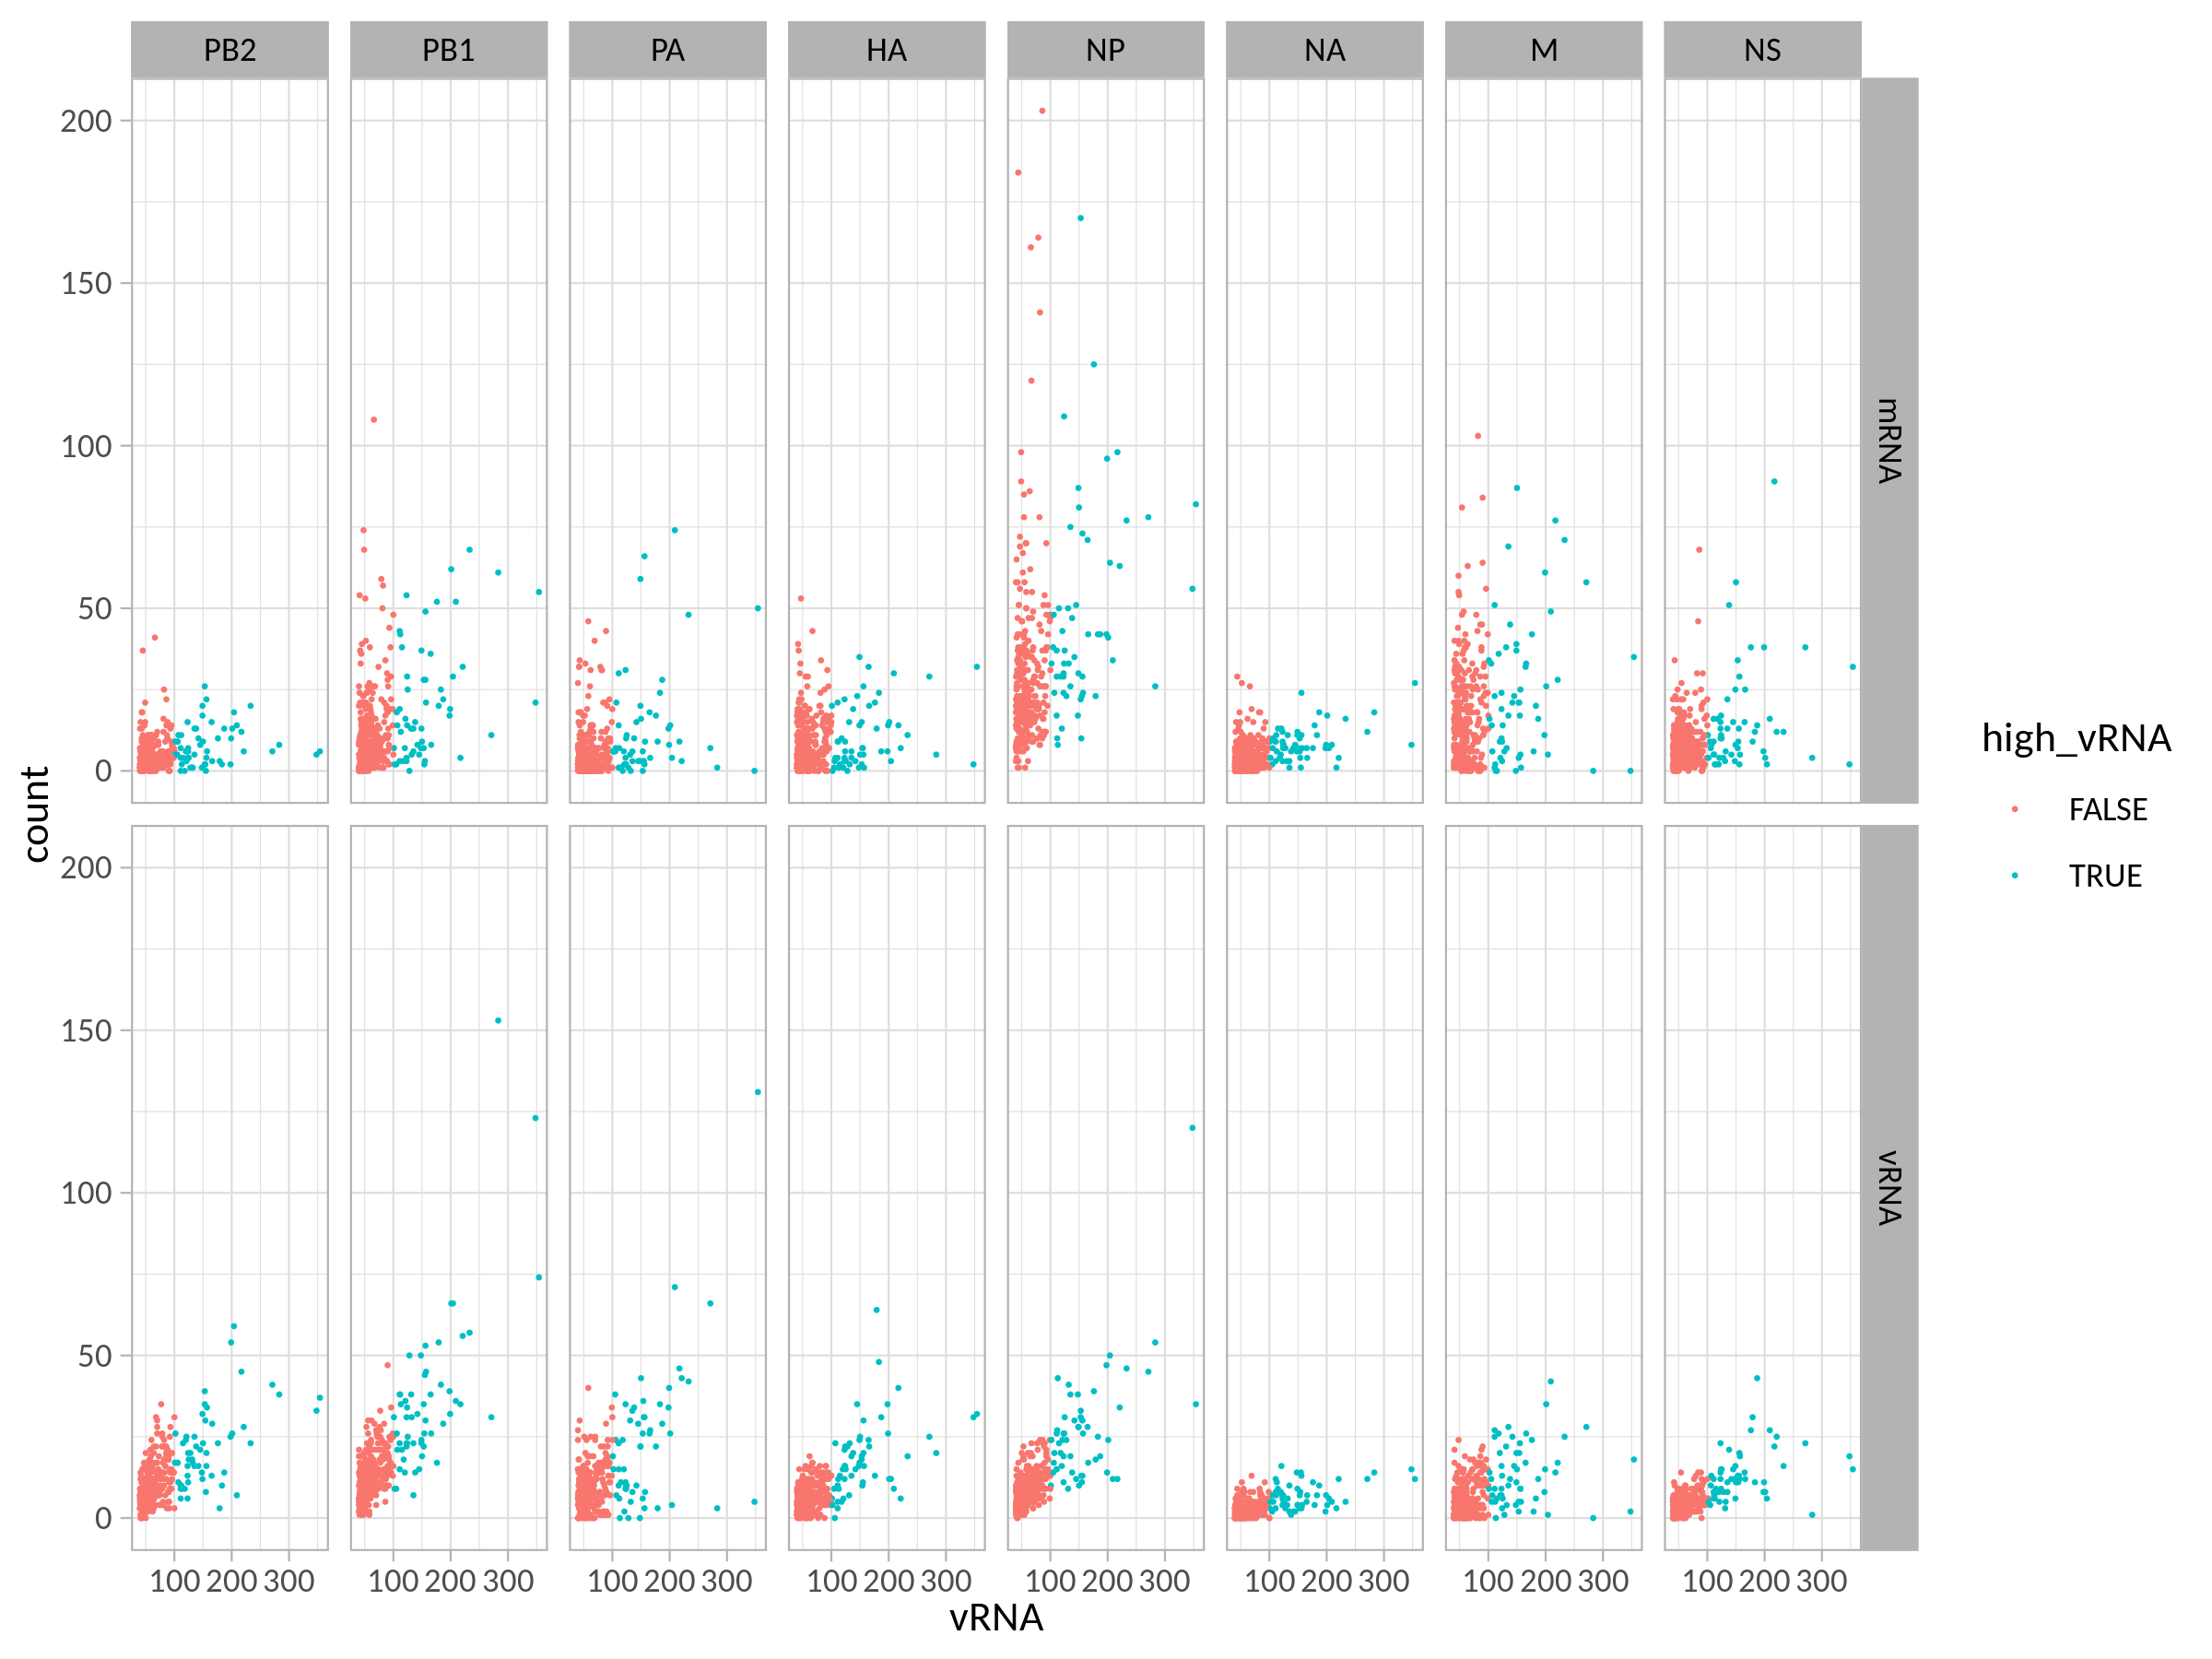

In [31]:
spots_wide_highV %>%
  ggplot(aes(x=vRNA, y=count, color=high_vRNA)) +
    geom_point(size=.1) +
    facet_grid(molecule ~ segment)

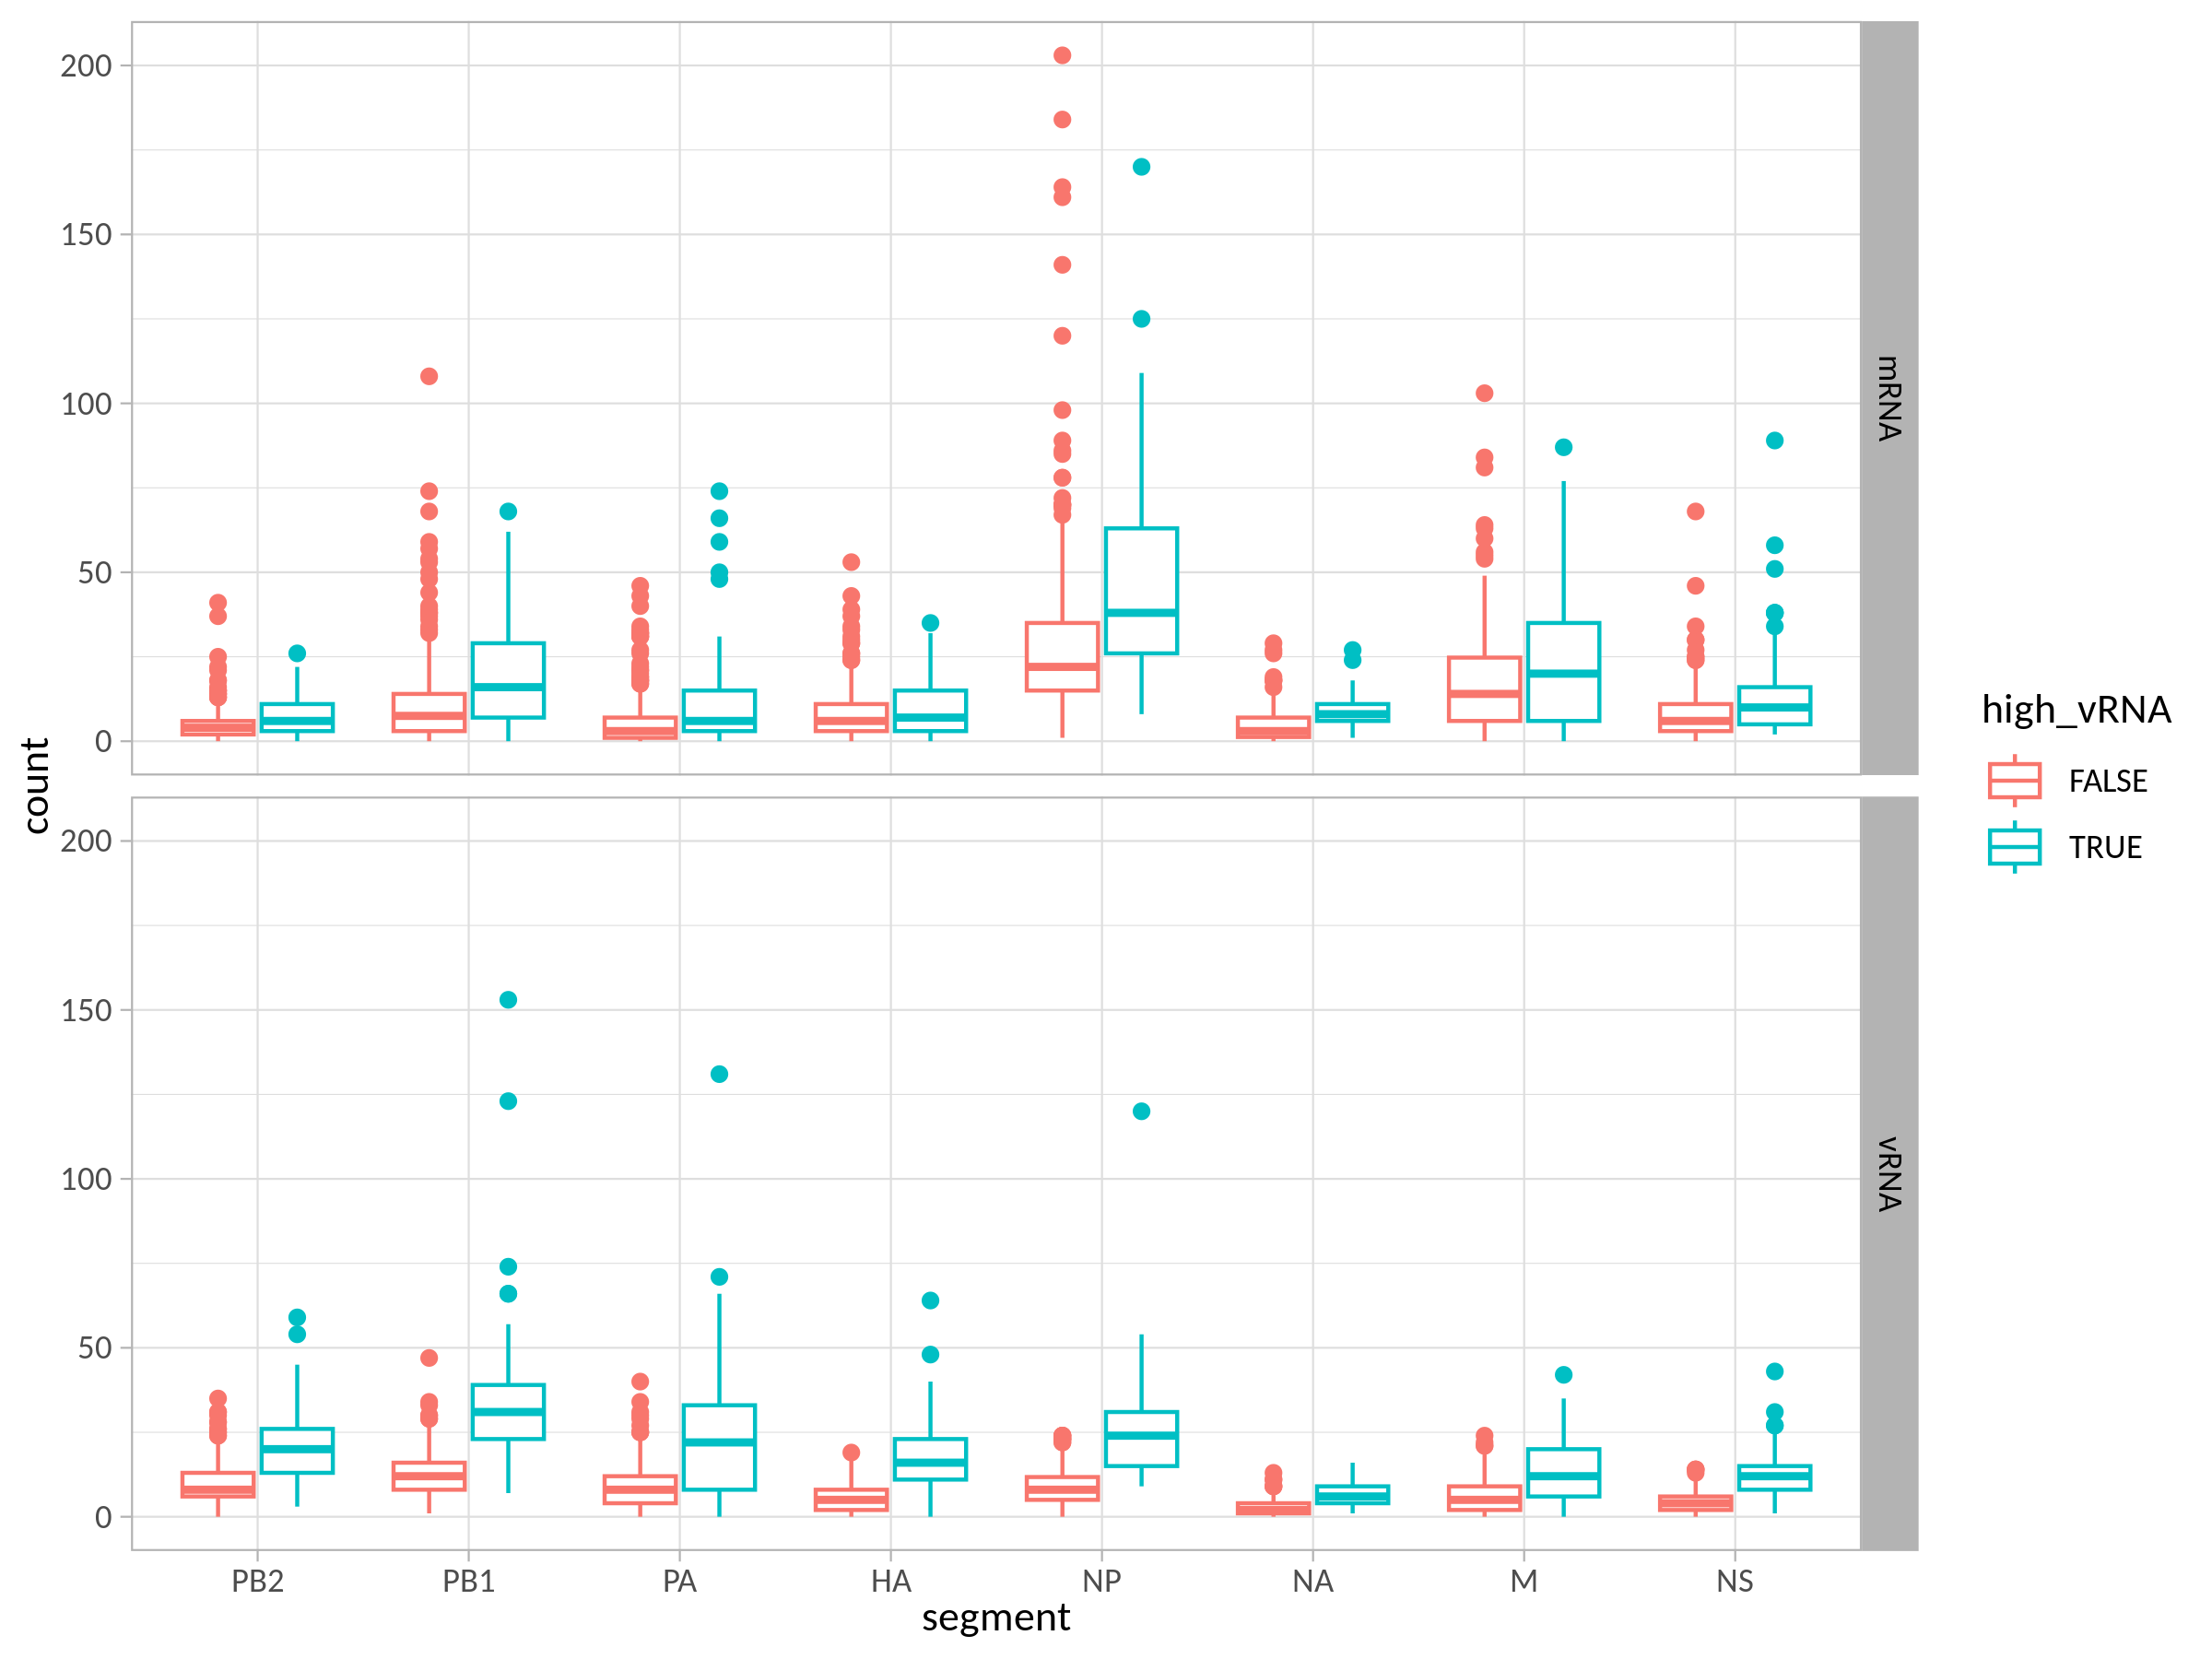

In [32]:
spots_wide_highV %>%
  ggplot(aes(x=segment, y=count, color=high_vRNA)) + geom_boxplot() + facet_grid(molecule ~ .)

### <a id='toc1_6_2_'></a>[Linear model to predict total vRNA from mRNA segments](#toc0_)

In [33]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [34]:
lm_fit_mRNA <- linear_reg() %>%
  set_engine("lm") %>%
  fit(vRNA ~ mRNA_PB1 + mRNA_PB2 + mRNA_HA + mRNA_NA + mRNA_NP + mRNA_M + mRNA_PA + mRNA_NS, data=filter(spots_wide, mRNA>=40, mRNAs>=6))

In [35]:
tidy(lm_fit_mRNA)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.17446542,0.91281630,2.3821501,1.726949e-02
mRNA_PB1,0.49987532,0.05622269,8.8909893,9.870421e-19
mRNA_PB2,-0.20336694,0.13206187,-1.5399368,1.236738e-01
mRNA_HA,-0.08720898,0.07404971,-1.1777085,2.389997e-01
mRNA_NA,1.33667429,0.12864641,10.3902964,6.749302e-25
mRNA_NP,-0.14227635,0.02290110,-6.2126438,5.876540e-10
mRNA_M,0.94336520,0.04620836,20.4154663,3.146758e-87
mRNA_PA,1.16162543,0.08835056,13.1479119,1.679169e-38
mRNA_NS,0.04791811,0.06406016,0.7480173,4.545043e-01


This is Table 2 in the manuscript

In [36]:
tidy(lm_fit_mRNA) %>% print

# A tibble: 9 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   2.17      0.913      2.38  1.73e- 2
2 mRNA_PB1      0.500     0.0562     8.89  9.87e-19
3 mRNA_PB2     -0.203     0.132     -1.54  1.24e- 1
4 mRNA_HA      -0.0872    0.0740    -1.18  2.39e- 1
5 mRNA_NA       1.34      0.129     10.4   6.75e-25
6 mRNA_NP      -0.142     0.0229    -6.21  5.88e-10
7 mRNA_M        0.943     0.0462    20.4   3.15e-87
8 mRNA_PA       1.16      0.0884    13.1   1.68e-38
9 mRNA_NS       0.0479    0.0641     0.748 4.55e- 1


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2268 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 2268 rows containing missing values or values outside the scale range
(`geom_point()`).”


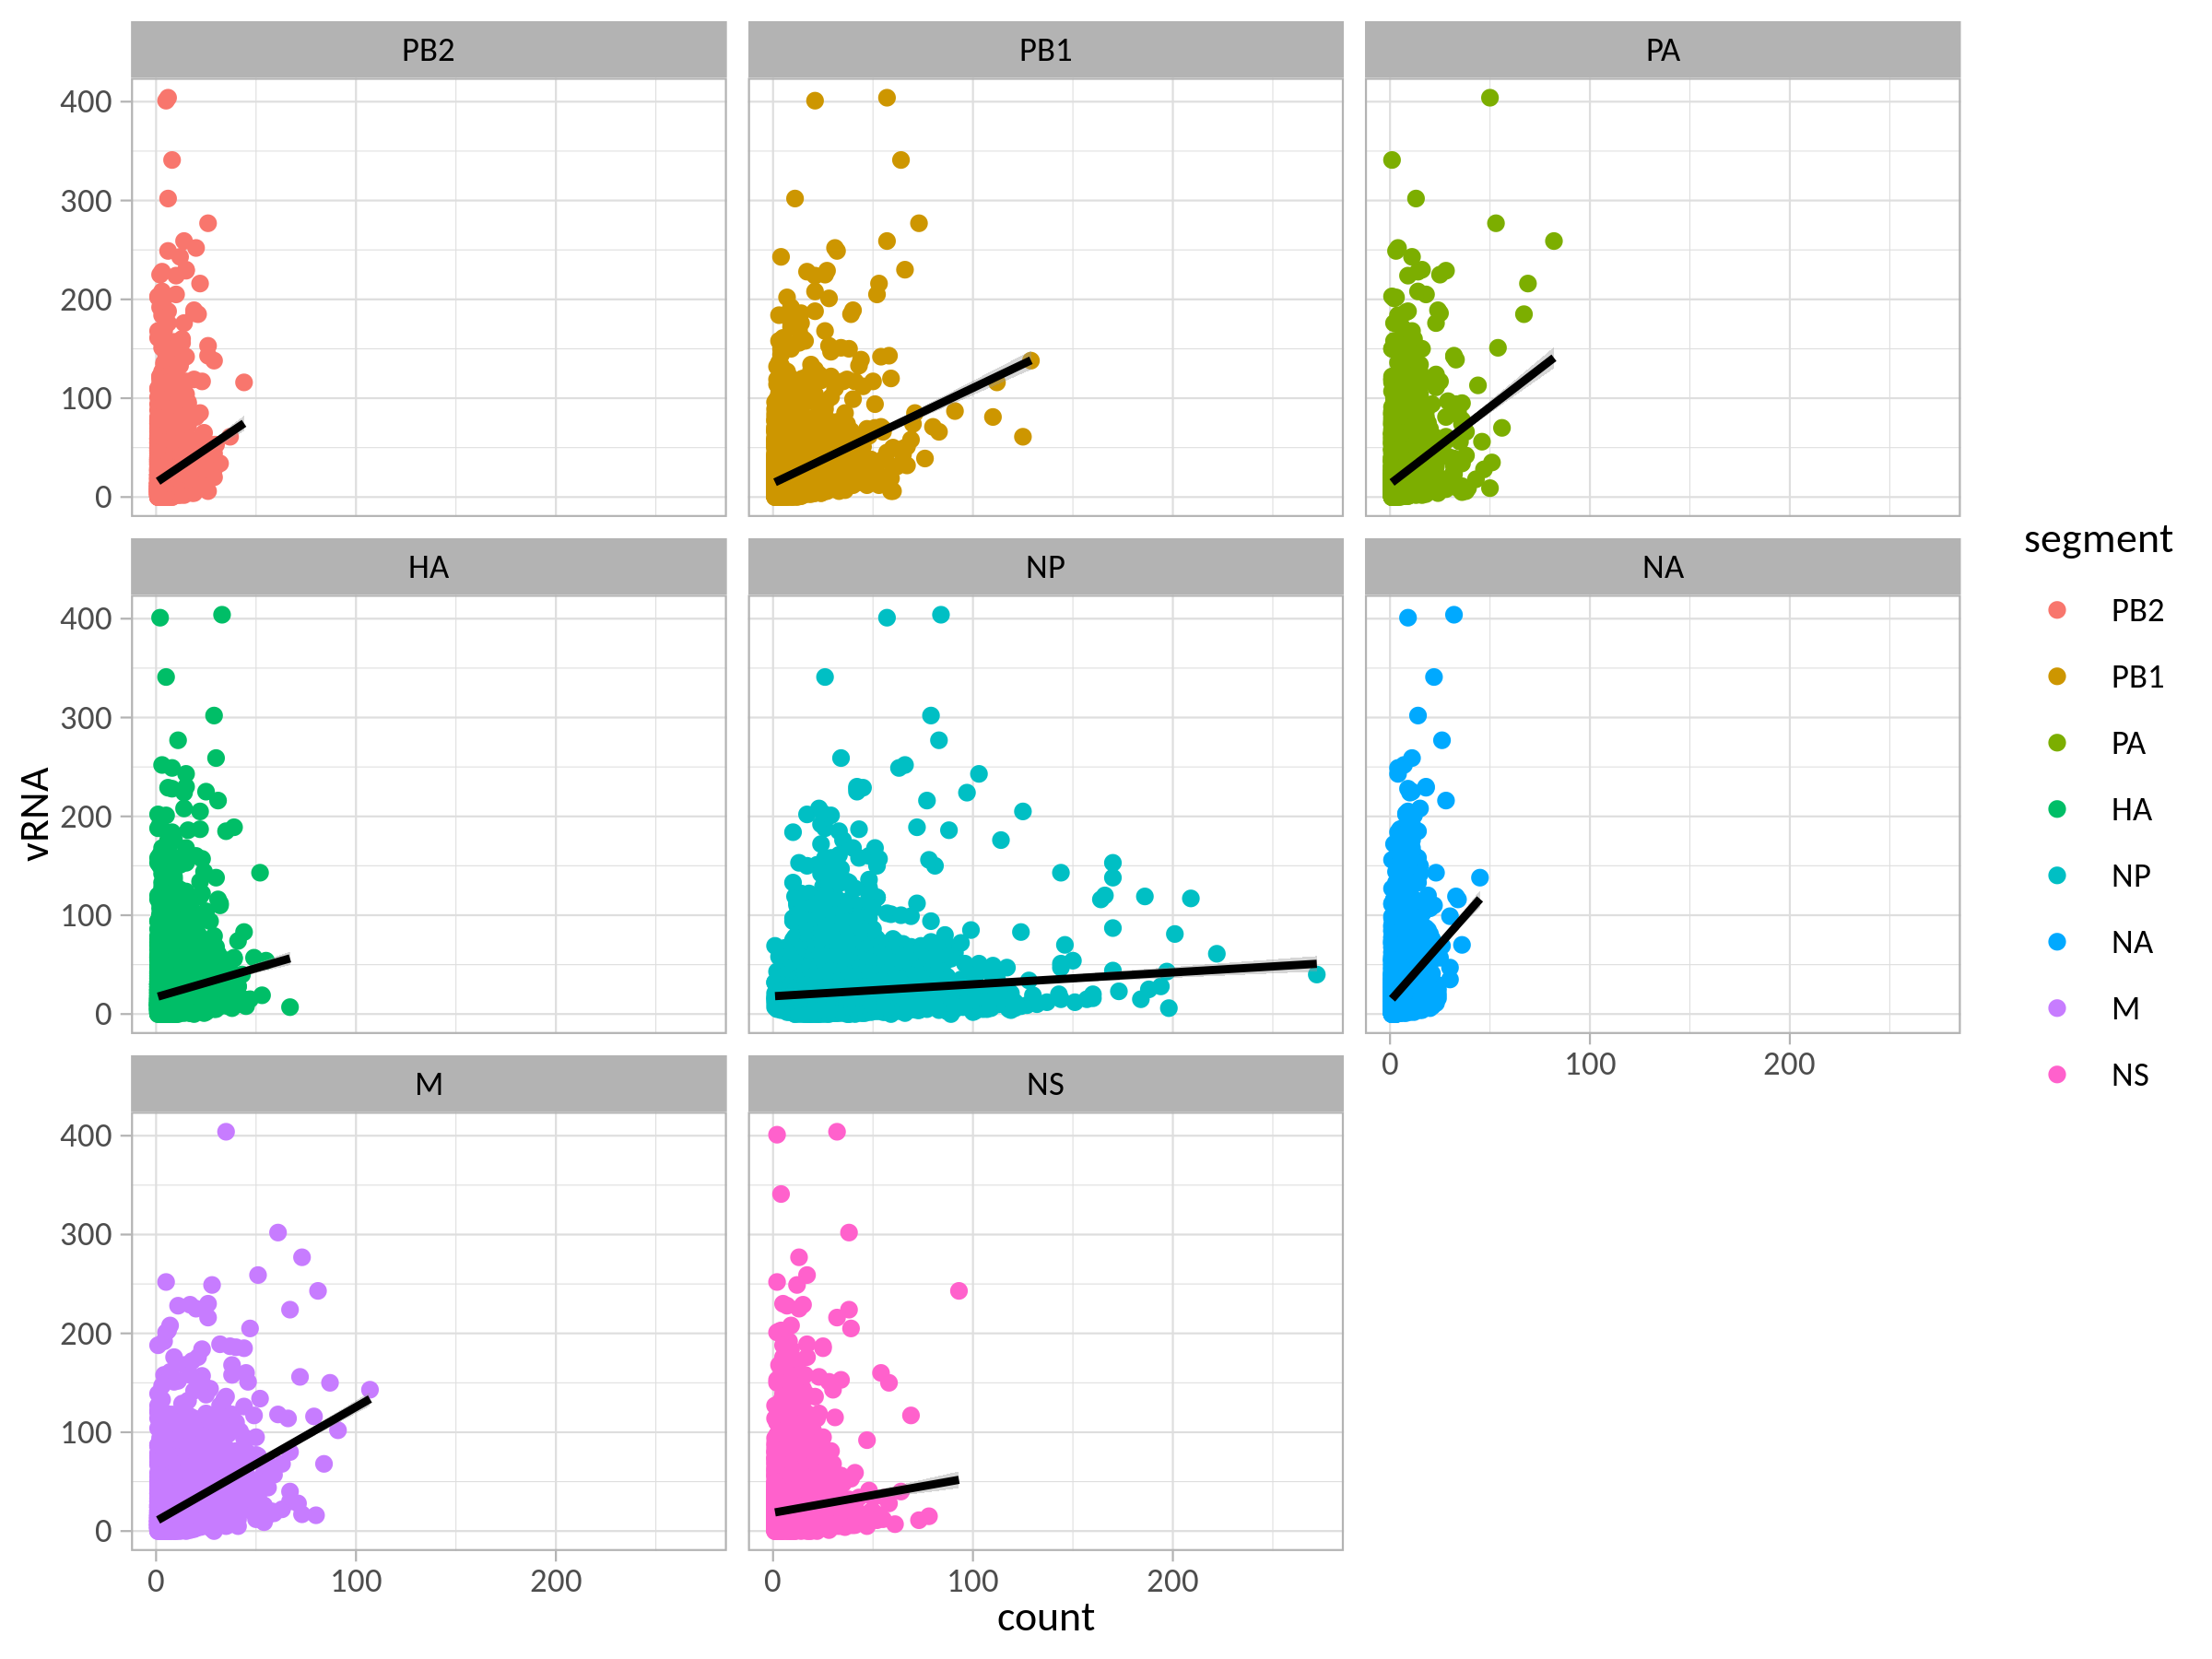

In [37]:
spots_wide %>%
  filter(mRNA >= 40, mRNAs >= 6) %>%
  select(cell, starts_with("mRNA_"), vRNA) %>%
  pivot_longer(starts_with("mRNA_"), names_to="segment", values_to="count") %>%
  mutate(segment=str_remove(segment, "mRNA_"), segment=fct_relevel(segment, segment_order)) %>%
  ggplot(aes(x=count, y=vRNA, color=segment)) +
    geom_point() +
    geom_smooth(method="lm", color="black") +
    facet_wrap(~segment)


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 163 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


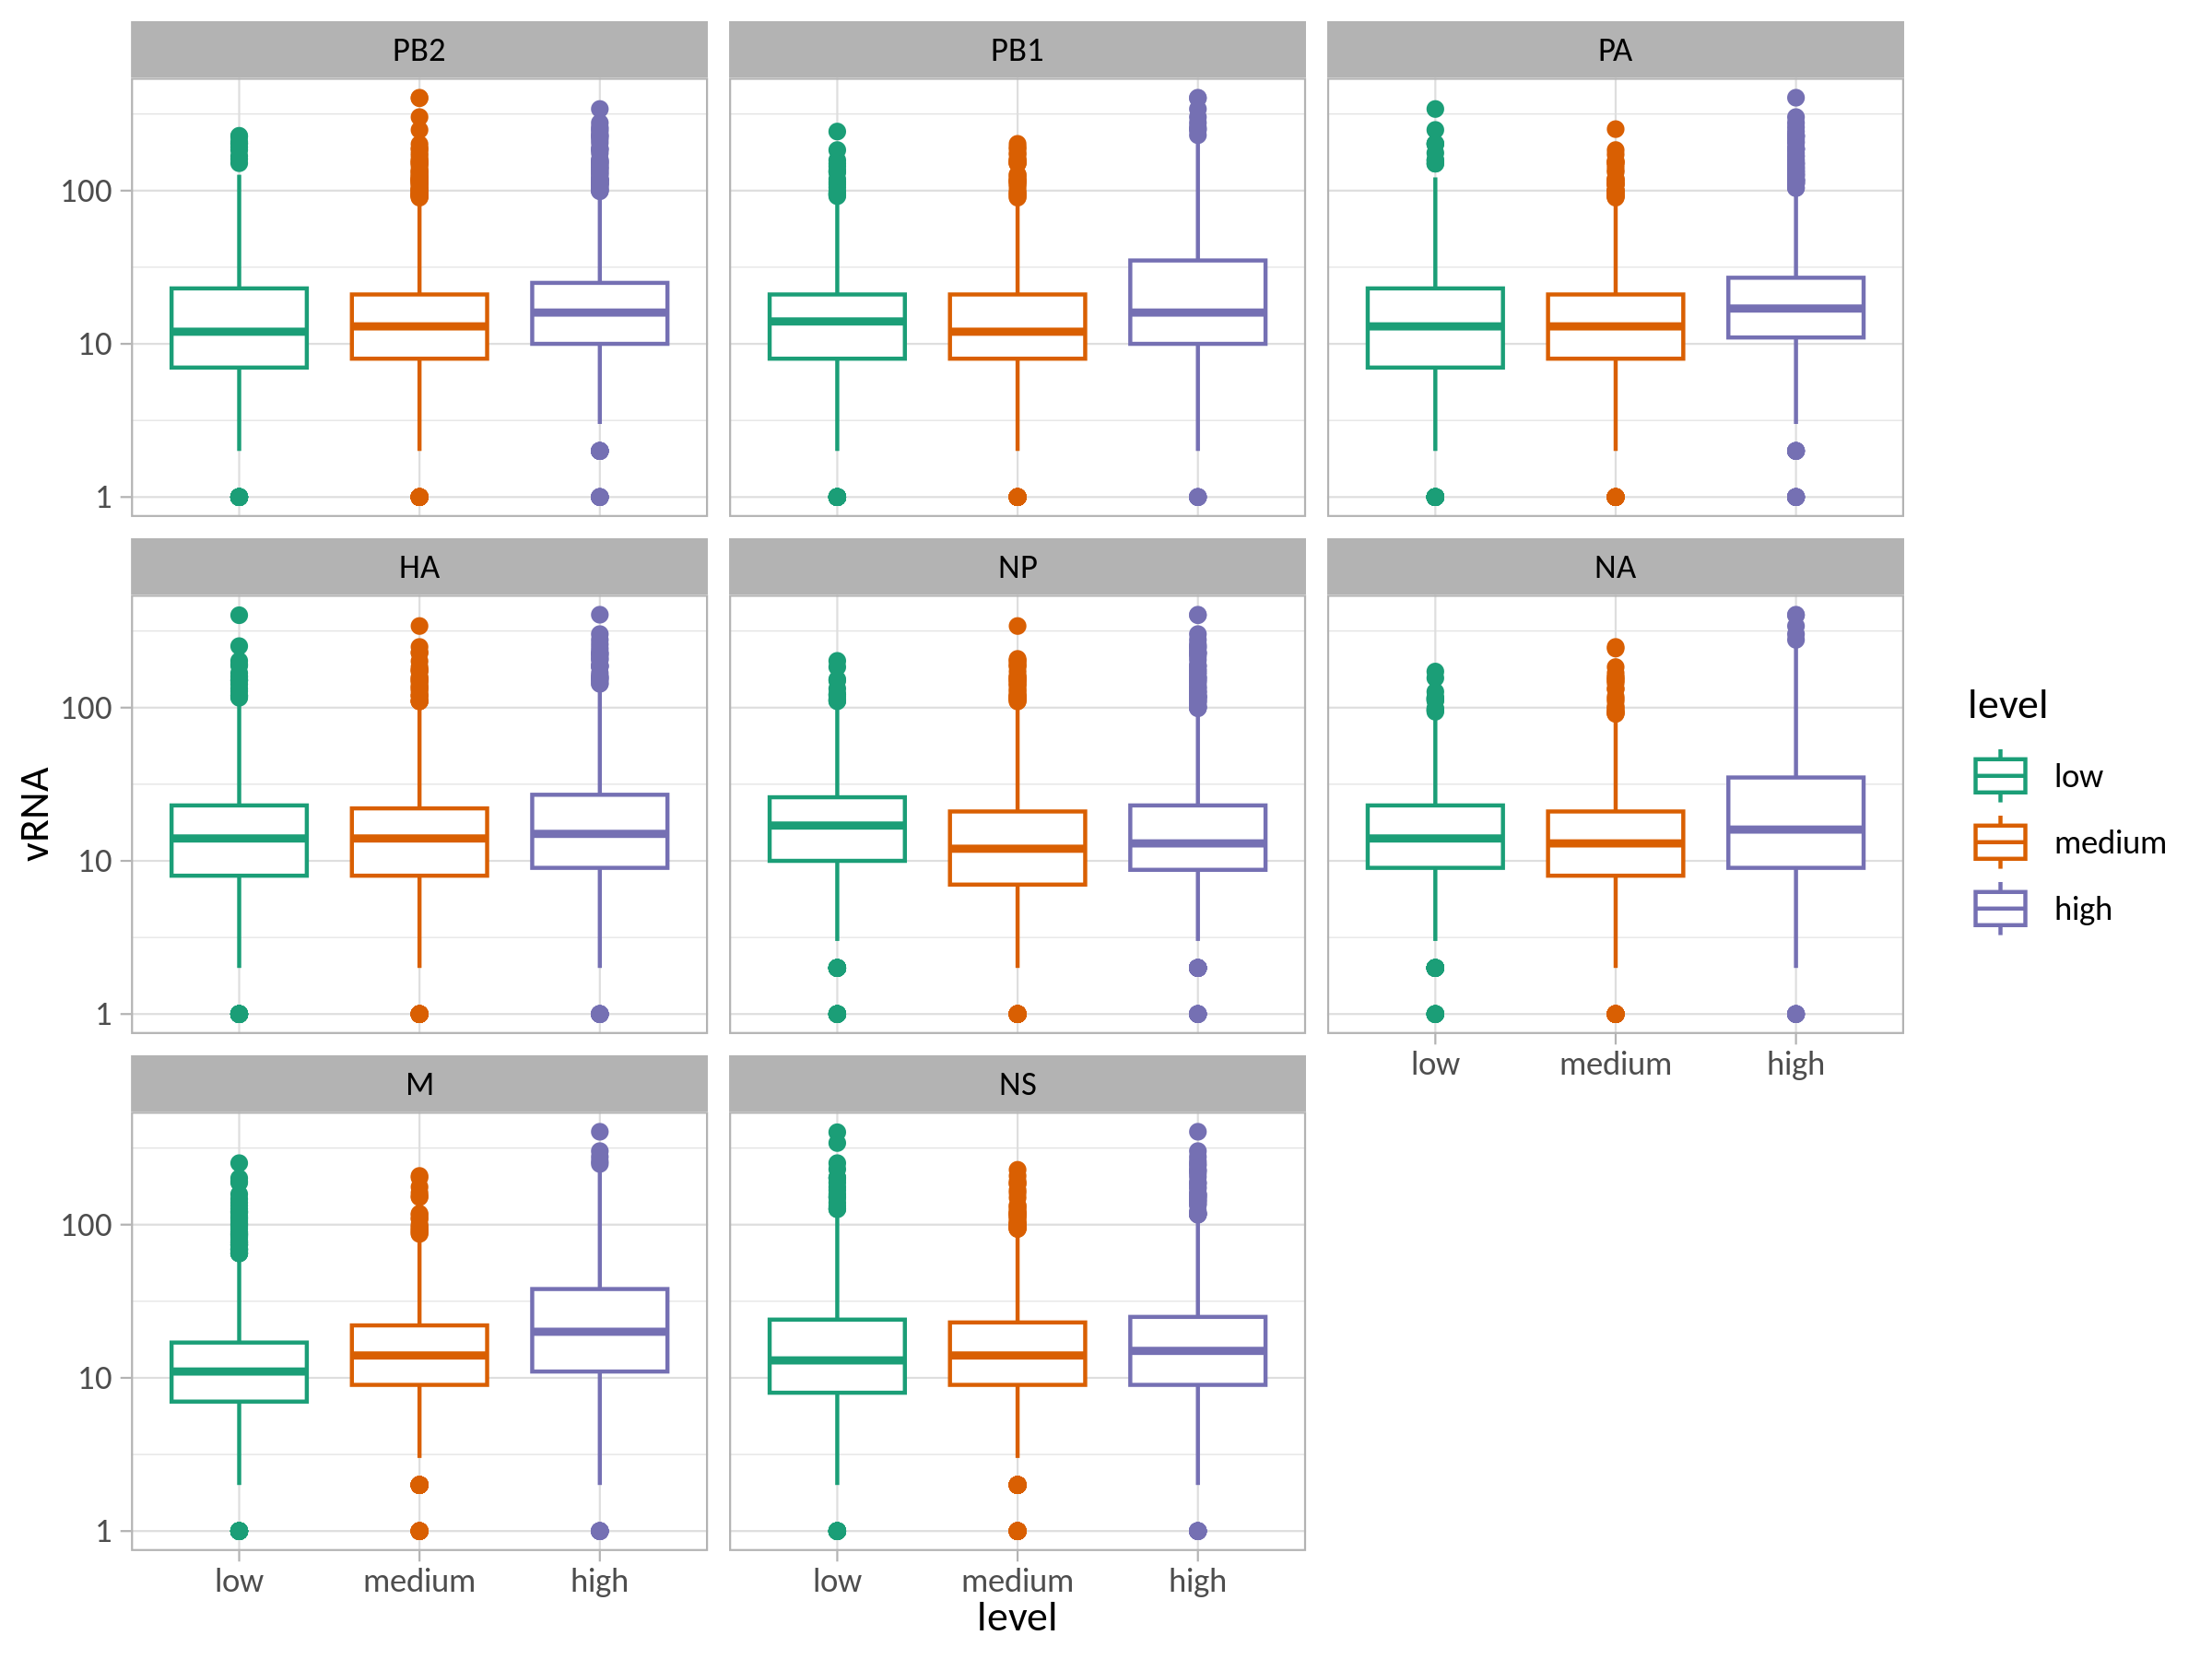

In [38]:
lmh = c("low", "medium", "high")
spots_wide %>%
  filter(mRNA >= 40, mRNAs >= 6) %>%
  select(cell, starts_with("mRNA_"), vRNA) %>%
  pivot_longer(starts_with("mRNA_"), names_to="segment", values_to="count") %>%
  drop_na() %>%
  mutate(segment=str_remove(segment, "mRNA_"), segment=fct_relevel(segment, segment_order)) %>%
  group_by(segment) %>%
  mutate(
    level = ntile(count, 3),
    level=lmh[level],
    level=fct_relevel(level, lmh)) %>%
  ggplot(aes(x=level, y=vRNA, color=level)) +
    geom_boxplot() +
    facet_wrap(~segment) +
    scale_y_log10() +
    scale_color_brewer(palette = "Dark2") +
    NULL

In [39]:
ggsave("figures/fig6c-segment-wise-mRNA-total-vRNA-boxplot.svg", width = 8, height = 6, dpi = 300)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 163 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


### <a id='toc1_6_3_'></a>[Effect of missing vRNA on total vRNA](#toc0_)

**TODO** add analysis by Redmond (Fig. 6d)